## <a id=99>Описание датасета</a> 
[К датасету](#1)


___
## <center><a id=0 style='color:red'>Импорт библиотек</a>

In [3]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, Normalizer, MinMaxScaler, PowerTransformer, PolynomialFeatures, OrdinalEncoder, TargetEncoder

from ds_nms import  data_proc, stat_tests, utils_io

In [4]:
np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

___
## <center><a id=1 style='color:red'>Импорт датасета</a>
 [К описанию](#99)

In [5]:
data_initial = pd.read_excel('data/Data(2).xlsx')

display(data_initial.head(3))
data_initial.shape

tpu id                    tpu name  sum validations  morning rush hour  \
0       1           Генерала Тюленева             3700                961   
1       2  Университет Дружбы Народов             9470                500   
2       7                     Коптево            19151               2287   

   evening rush hour  gsm population  gsm zone mcd population  gsm workplaces  \
0                288    33349.734790                 0.000000     9024.025364   
1               1700    44319.392083                 0.000000    22920.388808   
2               1849    61779.220594             13030.090191    24263.766188   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
0                 0.000000         16794.209437                        0.0   
1                 0.000000             0.000000                        0.0   
2              4200.174302          6424.672688                        0.0   

   area hospital  zone area hospital  cluster  
0    2601.096069            0.000000        2  
1  524163.822269            0.000000        1  
2   41312.099110         4825.454481        2

(132, 14)

___
### Дубликаты

In [6]:
df_dupl_sum_validations = data_proc.get_duplicated_df(data_initial, 'sum validations')
df_dupl_sum_validations

tpu id  tpu name  sum validations  morning rush hour  evening rush hour  \
17     374  Коньково            30699               4707               2162   
25     538  Бибирево            30699               5462               1651   

    gsm population  gsm zone mcd population  gsm workplaces  \
17    41631.358323                 0.000000    10706.816009   
25   109239.591718             12460.115469    30354.062124   

    gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
17                 0.000000         80080.543594                   0.000000   
25              4091.938161        168971.130622               10901.809243   

    area hospital  zone area hospital  cluster  
17  224794.313980            0.000000        0  
25   55449.152038         2686.667267        0

In [7]:
df_dupl_y2 = data_proc.get_duplicated_df(data_initial, 'morning rush hour')

display(df_dupl_y2)
df_dupl_y2.shape

tpu id                tpu name  sum validations  morning rush hour  \
0        1       Генерала Тюленева             3700                961   
97    2962  Волгоградский проспект            24561                961   
46    1293               Каширская            37108               2952   
49    1417            Измайловская            21563               2952   

    evening rush hour  gsm population  gsm zone mcd population  \
0                 288    33349.734790                 0.000000   
97               4044    13840.133755              4062.678852   
46               4337    20220.482623              1045.269807   
49               1250    30982.267286                 0.000000   

    gsm workplaces  gsm zone mcd workplaces  area shopping malls  \
0      9024.025364                 0.000000         16794.209437   
97    15853.485611              5132.172705        102742.973071   
46    20659.341923              1598.164644        112962.364396   
49    10492.425117                 0.000000         22932.881010   

    zone area shopping malls   area hospital  zone area hospital  cluster  
0                    0.000000    2601.096069            0.000000        2  
97               17633.439959    3034.372429         2693.415393        1  
46               76998.669299  406127.732639            0.000000        2  
49                   0.000000   13899.833561            0.000000        0

(4, 14)

In [8]:
df_dupl_y3 = data_proc.get_duplicated_df(data_initial, 'evening rush hour')

display(df_dupl_y3)
df_dupl_y3.shape

tpu id              tpu name  sum validations  morning rush hour  \
50    1470             Давыдково            15701               1468   
81    2697  Нахимовский проспект            22604               2465   

    evening rush hour  gsm population  gsm zone mcd population  \
50               2803    51201.489539             16051.606314   
81               2803    31968.092514               810.384902   

    gsm workplaces  gsm zone mcd workplaces  area shopping malls  \
50    33554.506138              7862.430102         18630.586770   
81    14015.134111               280.143386         11745.498201   

    zone area shopping malls   area hospital  zone area hospital  cluster  
50                2269.596039    1995.275881          438.491763        2  
81                   0.000000   22441.700702            0.000000        2

(2, 14)

Text(0.5, 1.0, 'Станции с одинаковым утренним пассажиропотоком')

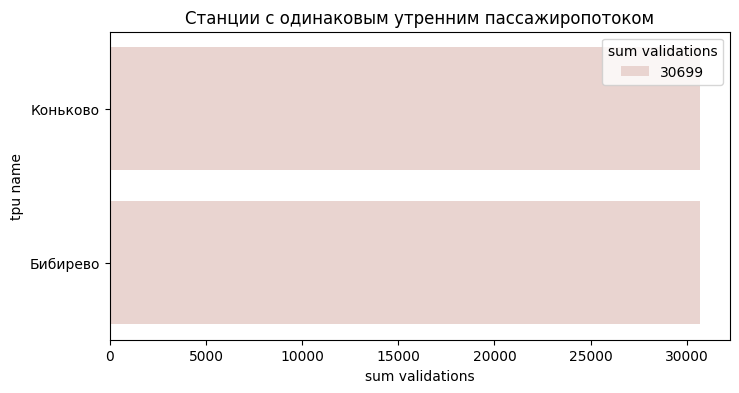

In [9]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_sum_validations, x='sum validations', y='tpu name', hue='sum validations')
plt.title("Станции с одинаковым утренним пассажиропотоком")

Text(0.5, 1.0, 'Станции с одинаковым утренним пассажиропотоком')

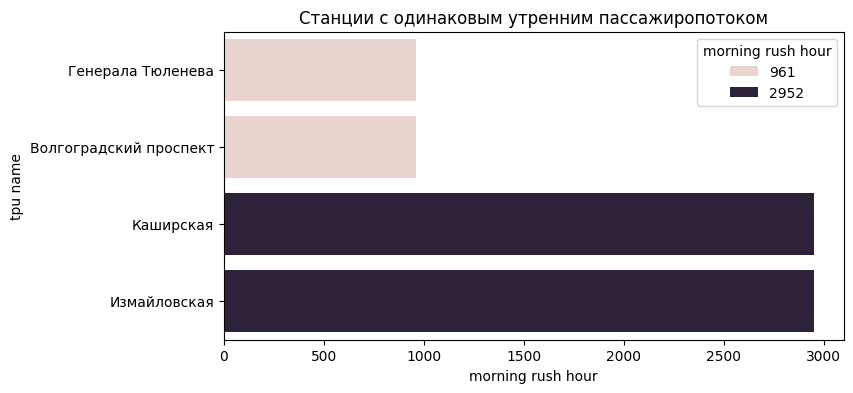

In [10]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_y2, x='morning rush hour', y='tpu name', hue='morning rush hour')
plt.title("Станции с одинаковым утренним пассажиропотоком")


Text(0.5, 1.0, 'Станции с одинаковым вечерним пассажиропотоком')

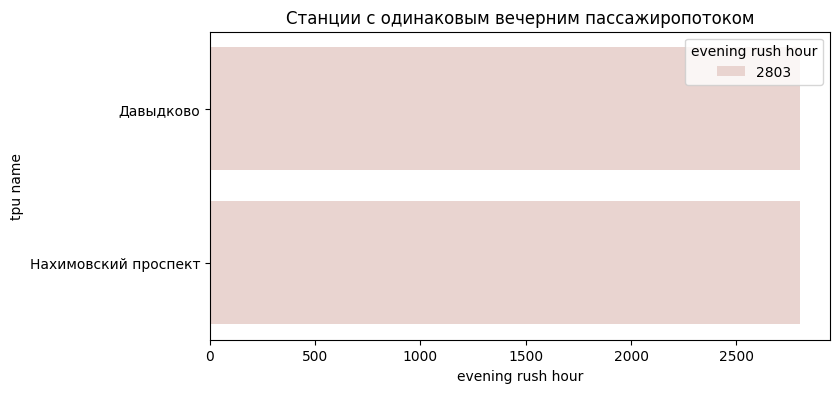

In [11]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_y3, x='evening rush hour', y='tpu name', hue='evening rush hour')
plt.title("Станции с одинаковым вечерним пассажиропотоком")

- duplicates

In [12]:
dupl = data_initial.duplicated()
data_initial[dupl].values

array([], shape=(0, 14), dtype=object)

- NaN

In [13]:
(data_initial.isna()).any()

tpu id                       False
tpu name                     False
sum validations              False
morning rush hour            False
evening rush hour            False
gsm population               False
gsm zone mcd population      False
gsm workplaces               False
gsm zone mcd workplaces      False
area shopping malls          False
zone area shopping malls     False
area hospital                False
zone area hospital           False
cluster                      False
dtype: bool

In [14]:
# data_initial = data_initial.fillna(0)

# data_initial.to_pickle('data/data_initial.pkl')

In [15]:
data_initial.head(2)

tpu id                    tpu name  sum validations  morning rush hour  \
0       1           Генерала Тюленева             3700                961   
1       2  Университет Дружбы Народов             9470                500   

   evening rush hour  gsm population  gsm zone mcd population  gsm workplaces  \
0                288    33349.734790                      0.0     9024.025364   
1               1700    44319.392083                      0.0    22920.388808   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
0                      0.0         16794.209437                        0.0   
1                      0.0             0.000000                        0.0   

   area hospital  zone area hospital  cluster  
0    2601.096069                 0.0        2  
1  524163.822269                 0.0        1

In [16]:
data_initial.to_pickle('data/data_initial.pkl')
data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tpu id                     132 non-null    int64  
 1   tpu name                   132 non-null    object 
 2   sum validations            132 non-null    int64  
 3   morning rush hour          132 non-null    int64  
 4   evening rush hour          132 non-null    int64  
 5   gsm population             132 non-null    float64
 6   gsm zone mcd population    132 non-null    float64
 7   gsm workplaces             132 non-null    float64
 8   gsm zone mcd workplaces    132 non-null    float64
 9   area shopping malls        132 non-null    float64
 10  zone area shopping malls   132 non-null    float64
 11  area hospital              132 non-null    float64
 12  zone area hospital         132 non-null    float64
 13  cluster                    132 non-null    int64  

In [17]:
df = data_initial.iloc[:, 2:]
df

sum validations  morning rush hour  evening rush hour  gsm population  \
0               3700                961                288    33349.734790   
1               9470                500               1700    44319.392083   
2              19151               2287               1849    61779.220594   
3              59351               8619               3240    85609.747000   
4              31121               4226               1974    45335.174628   
..               ...                ...                ...             ...   
127            14017                588               2510    11042.931220   
128            16071               1288               2649    31825.955181   
129            10028               1202               1206     7208.814817   
130             6926                782                559    13113.525187   
131            12707                199               1722     8339.612966   

     gsm zone mcd population  gsm workplaces  gsm zone mcd workplaces  \
0                   0.000000     9024.025364                 0.000000   
1                   0.000000    22920.388808                 0.000000   
2               13030.090191    24263.766188              4200.174302   
3                  59.610233    20973.161734                17.583812   
4               10398.544866    13000.939690              2482.662990   
..                       ...             ...                      ...   
127              1403.275998    10539.078961               888.545408   
128              5611.333326    19431.224640              3224.503501   
129               586.853112     5021.009522               388.833936   
130                63.787863    13760.110134                48.831111   
131                 0.000000    10310.920999                 0.000000   

     area shopping malls  zone area shopping malls   area hospital  \
0           16794.209437                   0.000000    2601.096069   
1               0.000000                   0.000000  524163.822269   
2            6424.672688                   0.000000   41312.099110   
3          104277.084316                   0.000000   13759.054491   
4            5017.099687                  84.212634   15864.423035   
..                   ...                        ...            ...   
127        176454.612737                   0.000000   17176.578258   
128            73.752155                   0.000000       0.000000   
129             0.000000                   0.000000    6859.355907   
130           690.175329                   0.000000       0.000000   
131         29677.146489                   0.000000   42463.015669   

     zone area hospital  cluster  
0              0.000000        2  
1              0.000000        1  
2           4825.454481        2  
3              0.000000        0  
4           4375.824312        0  
..                  ...      ...  
127            0.000000        1  
128            0.000000        1  
129         6859.355907        2  
130            0.000000        2  
131            0.000000        1  

[132 rows x 12 columns]

- Отрицательные значения должны отсутствовать

In [18]:
(df.min().values < 0).any()


False

In [19]:
x, y, o = data_proc.drop_outliers_iso(df, df['sum validations'])
o

Удалено 6 объектов из 132


sum validations  morning rush hour  evening rush hour  gsm population  \
8              32565               5855               2177    78743.179344   
20             53622              10056               2951   125339.146470   
22             20409               2369               1967    55088.824685   
28             20896               3819               1246   115213.756654   
41             70488              13015               2870   131039.542579   
122            51034                605              11901    18989.612826   

     gsm zone mcd population  gsm workplaces  gsm zone mcd workplaces  \
8               40022.637609    22607.574474             11692.480771   
20              51883.041209    38794.713947             16838.356656   
22              23165.599039    24219.044611             13337.086778   
28              45518.486142    33029.243955             11926.327216   
41              46502.306653    34254.132772             11848.341916   
122              4310.561180    55396.202712              2850.012710   

     area shopping malls  zone area shopping malls   area hospital  \
8           81146.449874                   0.000000  158084.893282   
20         130559.945517               36619.061359  122161.368500   
22         233369.441105              105631.999986   64642.774336   
28          22116.685158                6965.890634  144652.910896   
41         101271.624821                6724.634578   60965.189646   
122        802082.612872                   0.000000  124371.722863   

     zone area hospital  cluster  
8         102940.547141        0  
20         16401.947363        0  
22         55968.122106        2  
28         25374.935610        0  
41          4328.074841        0  
122       100610.025134        1

In [20]:
x, y, o = data_proc.drop_outliers_tuk(df, df['sum validations'], 'sum validations', left=1, right=0.7)
o

Удалено 11 объектов из 132


sum validations  morning rush hour  evening rush hour  gsm population  \
18             69176               5214               7341    57529.133144   
41             70488              13015               2870   131039.542579   
42             64265               5984               7102    54056.915792   
73             65467               1685               9484    32401.935449   
77             68925               1520              11219    22402.508032   
78             65235               1014              10117     8525.233833   
84             68604               1162              12897    13037.569439   
87             84836                905              12741     4942.540452   
89             64450               1025              10616    12613.254499   
90             69721               1136              11143    13007.069870   
109            69106               2826              10137    24052.841622   

     gsm zone mcd population  gsm workplaces  gsm zone mcd workplaces  \
18                  0.000000    27764.913722                 0.000000   
41              46502.306653    34254.132772             11848.341916   
42              19148.244226    35496.175859              9223.180070   
73               1653.732636    45225.137360              2430.787216   
77                224.904890    42407.820507               270.668519   
78                  0.000000    31991.150679                 0.000000   
84                  0.000000    35814.578344                 0.000000   
87                  0.000000    23941.402494                 0.000000   
89                  0.000000    36477.142189                 0.000000   
90                  0.000000    32301.425612                 0.000000   
109                 0.000000    36498.177016                 0.000000   

     area shopping malls  zone area shopping malls   area hospital  \
18         115367.254088                   0.000000   18129.632569   
41         101271.624821                6724.634578   60965.189646   
42         411652.189588               23786.485729   27656.930753   
73          13961.537941                   0.000000   38531.629361   
77          14255.412166                   0.000000   40609.293095   
78           4677.751490                   0.000000   22629.166278   
84          91790.446595                   0.000000    9946.390357   
87         179431.115982                   0.000000    7597.513844   
89            366.656068                   0.000000   47116.631240   
90            707.463500                   0.000000   12727.301669   
109         28945.474070                   0.000000   69692.590313   

     zone area hospital  cluster  
18             0.000000        2  
41          4328.074841        0  
42          4028.725250        2  
73             0.000000        1  
77             0.000000        1  
78             0.000000        3  
84             0.000000        3  
87             0.000000        3  
89             0.000000        3  
90             0.000000        3  
109            0.000000        3

___
## <center><a id=2 style='color:red'>Разделение на категориальные и числовые признаки</a>

In [21]:
categorical_columns, numerical_columns = data_proc.features_separate(df=df, threshold=15)
numerical_columns.remove('sum validations')
numerical_columns.remove('morning rush hour')
numerical_columns.remove('evening rush hour')

print(f'Категориальные признаки: {categorical_columns}')
print(f'Числовые признаки: {numerical_columns}')

Категориальные признаки: ['cluster']
Числовые признаки: ['gsm population', 'gsm zone mcd population', 'gsm workplaces', 'gsm zone mcd workplaces', 'area shopping malls', 'zone area shopping malls ', 'area hospital', 'zone area hospital']


___
## <center><a id=3 style='color:red'>Разделение на обучающую и тестовую выборки</a>

In [22]:
target_1, target_2, target_3 = df['sum validations'].astype("float"), df['morning rush hour'].astype("float"), df['evening rush hour'].astype("float")

df = df.drop(['sum validations', 'morning rush hour', 'evening rush hour'], axis=1)
df.shape

(132, 9)

___
___

In [23]:
df.columns

Index(['gsm population', 'gsm zone mcd population', 'gsm workplaces',
       'gsm zone mcd workplaces', 'area shopping malls',
       'zone area shopping malls ', 'area hospital', 'zone area hospital',
       'cluster'],
      dtype='object')

___
___

___
### <a id=5>Target 1</a>

In [24]:
px.box(target_1, orientation='h')

In [25]:
df_strat_1 = data_proc.get_stratified_df(X=df, feature=target_1)

gsm population  gsm zone mcd population  gsm workplaces  \
0    33349.734790                 0.000000     9024.025364   
1    44319.392083                 0.000000    22920.388808   
2    61779.220594             13030.090191    24263.766188   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
0                 0.000000         16794.209437                        0.0   
1                 0.000000             0.000000                        0.0   
2              4200.174302          6424.672688                        0.0   

   area hospital  zone area hospital  cluster  strat  
0    2601.096069            0.000000        2      0  
1  524163.822269            0.000000        1      0  
2   41312.099110         4825.454481        2      1

strat
0    0.25
1    0.25
3    0.25
2    0.25
Name: proportion, dtype: float64

___

In [26]:
df_train_1, df_test_1, target_train_1, target_test_1 = train_test_split(df,
                                                                        target_1,
                                                                        stratify=df_strat_1[[
                                                                        'strat',
                                                                        'cluster'
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=1)

df_train_1.shape, df_test_1.shape, target_train_1.shape, target_test_1.shape

((99, 9), (33, 9), (99,), (33,))

In [27]:
px.box(target_train_1, orientation='h')

In [28]:

px.box(target_test_1, orientation='h')

___

- тест Колмогорова–Смирнова на равенство распределения выборок

p-value=0.99558
Данные могут быть взяты из одного распределения


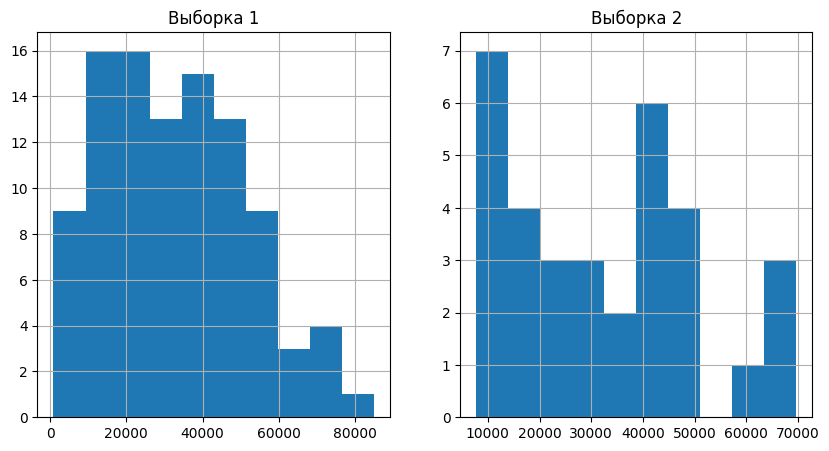

In [29]:
stat_tests.kolmog_smirn_test(target_train_1, target_test_1)
stat_tests.plot_test_hists(target_train_1, target_test_1)

In [30]:
init_cols = ['tpu id', 'tpu name', 'cluster']
utils_io.save_split_description(df_initial=data_initial,initial_columns=init_cols, target=target_train_1, df_name='X_train_1')
utils_io.save_split_description(df_initial=data_initial,initial_columns=init_cols, target=target_test_1, df_name='X_test_1')

pd.read_pickle('data/X_train_1_descr.pkl').head(3)

Файл data/X_train_1_descr.pkl сохранен!
Файл data/X_test_1_descr.pkl сохранен!


tpu id                tpu name  cluster
87    2791             Охотный Ряд        3
11     259  Улица Академика Янгеля        0
70    2260                   Сокол        1

___
### <a id=5>Target 2</a>

In [31]:
px.box(target_2, orientation='h')

In [32]:
df_strat_2 = data_proc.get_stratified_df(X=df, feature=target_2)

gsm population  gsm zone mcd population  gsm workplaces  \
0    33349.734790                 0.000000     9024.025364   
1    44319.392083                 0.000000    22920.388808   
2    61779.220594             13030.090191    24263.766188   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
0                 0.000000         16794.209437                        0.0   
1                 0.000000             0.000000                        0.0   
2              4200.174302          6424.672688                        0.0   

   area hospital  zone area hospital  cluster  strat  
0    2601.096069            0.000000        2      0  
1  524163.822269            0.000000        1      0  
2   41312.099110         4825.454481        2      1

strat
0    0.25
1    0.25
3    0.25
2    0.25
Name: proportion, dtype: float64

In [33]:
df_train_2, df_test_2, target_train_2, target_test_2 = train_test_split(df,
                                                                        target_2,
                                                                        stratify=df_strat_2[[
                                                                        # 'cluster',
                                                                        'strat',
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=0)

df_train_2.shape, df_test_2.shape, target_train_2.shape, target_test_2.shape

((99, 9), (33, 9), (99,), (33,))

In [34]:
px.box(target_train_2, orientation='h')

In [35]:
px.box(target_test_2, orientation='h')


- тест Колмогорова–Смирнова на равенство распределения выборок

p-value=0.90649
Данные могут быть взяты из одного распределения


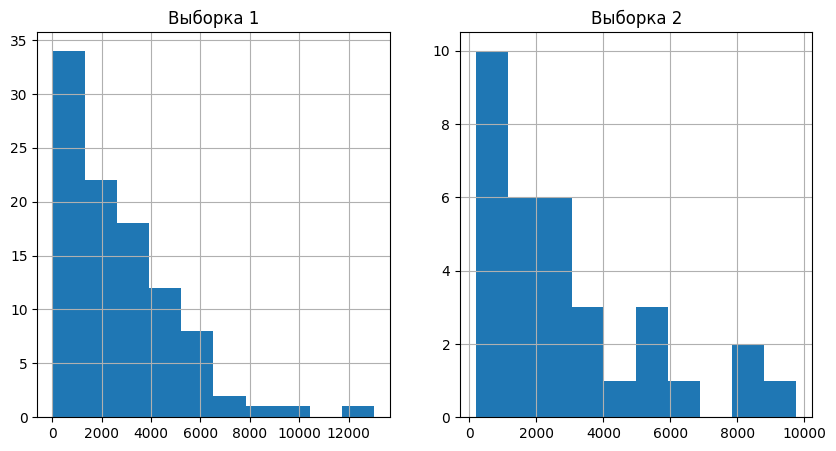

In [36]:
stat_tests.kolmog_smirn_test(target_train_2, target_test_2)
stat_tests.plot_test_hists(target_train_2, target_test_2)


___
### <a id=5>Target 3</a>

In [37]:
px.box(target_3, orientation='h')

In [38]:
df_strat_3 = data_proc.get_stratified_df(X=df, feature=target_3)

gsm population  gsm zone mcd population  gsm workplaces  \
0    33349.734790                 0.000000     9024.025364   
1    44319.392083                 0.000000    22920.388808   
2    61779.220594             13030.090191    24263.766188   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
0                 0.000000         16794.209437                        0.0   
1                 0.000000             0.000000                        0.0   
2              4200.174302          6424.672688                        0.0   

   area hospital  zone area hospital  cluster  strat  
0    2601.096069            0.000000        2      0  
1  524163.822269            0.000000        1      0  
2   41312.099110         4825.454481        2      1

strat
0    0.25
1    0.25
2    0.25
3    0.25
Name: proportion, dtype: float64

In [39]:
df_train_3, df_test_3, target_train_3, target_test_3 = train_test_split(df,
                                                                        target_3,
                                                                        stratify=df_strat_3[[
                                                                        'cluster',
                                                                        'strat',
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=4)

df_train_3.shape, df_test_3.shape, target_train_3.shape, target_test_3.shape

((99, 9), (33, 9), (99,), (33,))

In [40]:
px.box(target_train_3, orientation='h')


In [41]:
px.box(target_test_3, orientation='h')


p-value=0.90649
Данные могут быть взяты из одного распределения


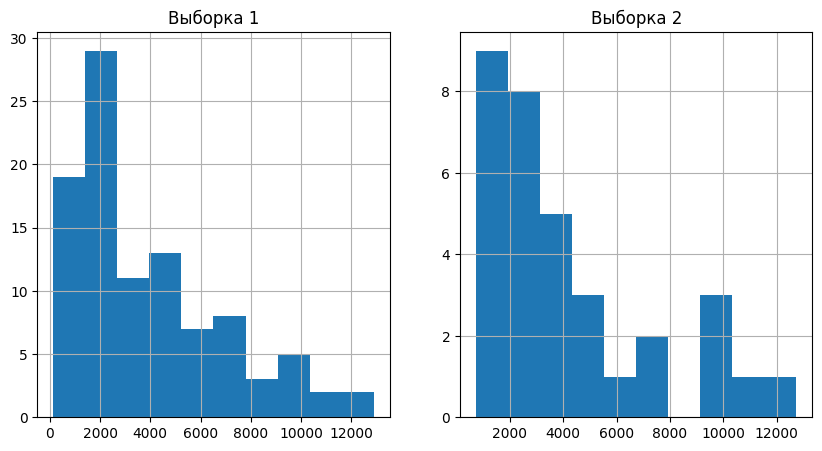

In [42]:
stat_tests.kolmog_smirn_test(target_train_3, target_test_3)
stat_tests.plot_test_hists(target_train_3, target_test_3)

___
## <center><a id=3 style='color:red'>Целевое кодирование</a>

In [43]:
df_train_te_1, df_test_te_1 = data_proc.df_target_encoding(
    df_train=df_train_1,
    df_test=df_test_1,
    y_train=target_train_1,
    encode_columns=categorical_columns)

(99, 1) (33, 1)


cluster
count     99.0
mean   32537.7
std     7372.2
min    23117.3
25%    27508.6
50%    30628.0
75%    33723.5
max    51065.6

cluster
count     33.0
mean   32892.5
std     7593.0
min    25374.4
25%    25374.4
50%    30837.2
75%    33781.6
max    48935.2

In [44]:
df_train_te_2, df_test_te_2 = data_proc.df_target_encoding(
    df_train=df_train_2,
    df_test=df_test_2,
    y_train=target_train_2,
    encode_columns=categorical_columns)

(99, 1) (33, 1)


cluster
count     99.0
mean    2771.0
std     1370.5
min      909.4
25%     1744.7
50%     2719.6
75%     4487.8
max     4816.7

cluster
count     33.0
mean    2824.0
std     1279.4
min      969.8
25%     1709.9
50%     2769.5
75%     4517.0
max     4517.0

In [45]:
df_train_te_3, df_test_te_3 = data_proc.df_target_encoding(
    df_train=df_train_3,
    df_test=df_test_3,
    y_train=target_train_3,
    encode_columns=categorical_columns)

(99, 1) (33, 1)


cluster
count     99.0
mean    3921.0
std     2108.7
min     1802.7
25%     2097.4
50%     2734.8
75%     5614.7
max     7984.6

cluster
count     33.0
mean    3872.5
std     2151.9
min     1960.5
25%     1960.5
50%     2679.8
75%     5397.4
max     7785.7

In [46]:
numerical_columns = numerical_columns + categorical_columns

___
## <center><a id=3 style='color:red'>Преобразование числовых признаков</a>

### <a id=5>Относительные признаки Target 1</a>

In [47]:
df_train_1.sample(1)

gsm population  gsm zone mcd population  gsm workplaces  \
2    61779.220594             13030.090191    24263.766188   

   gsm zone mcd workplaces  area shopping malls  zone area shopping malls   \
2              4200.174302          6424.672688                        0.0   

   area hospital  zone area hospital       cluster  
2    41312.09911         4825.454481  27508.593632

___
### <a id=5>Стандартизация Target 1</a>


In [87]:
X_train_std_1, X_test_std_1, scaler = data_proc.df_scaling(
    df_train_te_1,
    df_test_te_1,
    numerical_columns=numerical_columns,
    scaler=StandardScaler(),
    return_scaler=True
    )

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean             -0.0                     -0.0             0.0   
std               1.0                      1.0             1.0   
min              -1.4                     -0.5            -2.2   
25%              -0.7                     -0.5            -0.8   
50%              -0.3                     -0.5            -0.0   
75%               0.4                      0.1             0.8   
max               3.2                      5.0             2.5   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                      -0.0                  0.0   
std                        1.0                  1.0   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.3   
50%                       -0.5                 -0.3   
75%                        0.2                 -0.0   
max                        4.3                  8.9   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                        -0.0            0.0                 0.0      0.0  
std                          1.0            1.0                 1.0      1.0  
min                         -0.3           -0.8                -0.4     -1.3  
25%                         -0.3           -0.7                -0.4     -0.7  
50%                         -0.3           -0.3                -0.4     -0.3  
75%                         -0.3            0.5                -0.2      0.2  
max                          7.2            5.3                 5.3      2.5

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean             -0.2                     -0.0            -0.0   
std               0.9                      0.9             1.2   
min              -1.3                     -0.5            -1.8   
25%              -0.8                     -0.5            -0.9   
50%              -0.4                     -0.4            -0.2   
75%              -0.0                     -0.0             0.4   
max               2.8                      3.7             3.5   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                       0.1                  0.2   
std                        1.3                  1.2   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.3   
50%                       -0.4                 -0.1   
75%                        0.2                  0.0   
max                        5.2                  5.8   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.2           -0.4                 0.1      0.0  
std                          1.7            0.6                 1.5      1.0  
min                         -0.3           -0.8                -0.4     -1.0  
25%                         -0.3           -0.8                -0.4     -1.0  
50%                         -0.3           -0.7                -0.4     -0.2  
75%                         -0.3           -0.4                -0.4      0.2  
max                          9.0            1.6                 5.0      2.2

In [89]:
save_dict = {"std_scaler" : scaler}

utils_io.save_data(file_dict=save_dict,
                   sub_dir="scalers")

Файл data/scalers/std_scaler.pkl успешно сохранён.


### <a id=5>Нормализация Target 1</a>

In [49]:
X_train_mm_1, X_test_mm_1 = data_proc.df_scaling(
    df_train_te_1,
    df_test_te_1,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean              0.3                      0.1             0.5   
std               0.2                      0.2             0.2   
min               0.0                      0.0             0.0   
25%               0.1                      0.0             0.3   
50%               0.2                      0.0             0.5   
75%               0.4                      0.1             0.6   
max               1.0                      1.0             1.0   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                       0.1                  0.0   
std                        0.2                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.2                  0.0   
max                        1.0                  1.0   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                         0.0            0.1                 0.1      0.3  
std                          0.1            0.2                 0.2      0.3  
min                          0.0            0.0                 0.0      0.0  
25%                          0.0            0.0                 0.0      0.2  
50%                          0.0            0.1                 0.0      0.3  
75%                          0.0            0.2                 0.0      0.4  
max                          1.0            1.0                 1.0      1.0

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean              0.2                      0.1             0.5   
std               0.2                      0.2             0.3   
min               0.0                      0.0             0.1   
25%               0.1                      0.0             0.3   
50%               0.2                      0.0             0.4   
75%               0.3                      0.1             0.6   
max               0.9                      0.8             1.2   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                       0.1                  0.1   
std                        0.3                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.2                  0.0   
max                        1.2                  0.7   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.1            0.1                 0.1      0.3  
std                          0.2            0.1                 0.3      0.3  
min                          0.0            0.0                 0.0      0.1  
25%                          0.0            0.0                 0.0      0.1  
50%                          0.0            0.0                 0.0      0.3  
75%                          0.0            0.1                 0.0      0.4  
max                          1.2            0.4                 0.9      0.9

### <a id=5>Стандартизация Target 2</a>

In [50]:
X_train_std_2, X_test_std_2 = data_proc.df_scaling(
    df_train_te_2,
    df_test_te_2,
    numerical_columns=numerical_columns,
    scaler=StandardScaler())

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean              0.0                      0.0             0.0   
std               1.0                      1.0             1.0   
min              -1.3                     -0.5            -2.2   
25%              -0.7                     -0.5            -0.8   
50%              -0.2                     -0.4            -0.0   
75%               0.3                      0.0             0.8   
max               3.4                      4.7             2.2   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                       0.0                 -0.0   
std                        1.0                  1.0   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.3   
50%                       -0.5                 -0.3   
75%                        0.1                 -0.1   
max                        4.7                  7.7   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                        -0.0            0.0                -0.0      0.0  
std                          1.0            1.0                 1.0      1.0  
min                         -0.3           -0.8                -0.3     -1.4  
25%                         -0.3           -0.7                -0.3     -0.8  
50%                         -0.3           -0.4                -0.3     -0.0  
75%                         -0.3            0.5                -0.3      1.3  
max                          7.7            5.2                 4.4      1.5

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean              0.1                     -0.1             0.1   
std               1.1                      0.6             1.2   
min              -1.2                     -0.5            -1.6   
25%              -0.7                     -0.5            -0.5   
50%              -0.3                     -0.5            -0.1   
75%               0.8                      0.1             0.7   
max               2.8                      1.8             3.6   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                      -0.0                 -0.0   
std                        0.9                  0.6   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.3   
50%                       -0.6                 -0.3   
75%                        0.3                  0.0   
max                        3.0                  2.3   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.0           -0.3                -0.0      0.0  
std                          1.1            0.6                 0.9      0.9  
min                         -0.3           -0.8                -0.3     -1.3  
25%                         -0.3           -0.7                -0.3     -0.8  
50%                         -0.3           -0.4                -0.3     -0.0  
75%                         -0.3           -0.2                -0.3      1.3  
max                          6.2            1.0                 4.1      1.3

### <a id=5>Нормализация Target 2</a>

In [51]:
X_train_mm_2, X_test_mm_2 = data_proc.df_scaling(
    df_train_te_2,
    df_test_te_2,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean              0.3                      0.1             0.5   
std               0.2                      0.2             0.2   
min               0.0                      0.0             0.0   
25%               0.1                      0.0             0.3   
50%               0.2                      0.0             0.5   
75%               0.3                      0.1             0.7   
max               1.0                      1.0             1.0   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                       0.1                  0.0   
std                        0.2                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.1                  0.0   
max                        1.0                  1.0   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                         0.0            0.1                 0.1      0.5  
std                          0.1            0.2                 0.2      0.4  
min                          0.0            0.0                 0.0      0.0  
25%                          0.0            0.0                 0.0      0.2  
50%                          0.0            0.1                 0.0      0.5  
75%                          0.0            0.2                 0.0      0.9  
max                          1.0            1.0                 1.0      1.0

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean              0.3                      0.1             0.5   
std               0.2                      0.1             0.3   
min               0.0                      0.0             0.1   
25%               0.1                      0.0             0.4   
50%               0.2                      0.0             0.5   
75%               0.4                      0.1             0.7   
max               0.9                      0.4             1.3   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                       0.1                  0.0   
std                        0.2                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.2                  0.0   
max                        0.7                  0.3   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.0            0.1                 0.1      0.5  
std                          0.1            0.1                 0.2      0.3  
min                          0.0            0.0                 0.0      0.0  
25%                          0.0            0.0                 0.0      0.2  
50%                          0.0            0.1                 0.0      0.5  
75%                          0.0            0.1                 0.0      0.9  
max                          0.8            0.3                 0.9      0.9

### <a id=5>Стандартизация Target 3</a>

In [52]:
X_train_std_3, X_test_std_3 = data_proc.df_scaling(
    df_train_te_3,
    df_test_te_3,
    numerical_columns=numerical_columns,
    scaler=StandardScaler())

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean              0.0                     -0.0             0.0   
std               1.0                      1.0             1.0   
min              -1.3                     -0.5            -2.0   
25%              -0.7                     -0.5            -0.8   
50%              -0.2                     -0.5            -0.1   
75%               0.4                      0.1             0.6   
max               3.3                      5.2             3.2   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                      -0.0                  0.0   
std                        1.0                  1.0   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.4   
50%                       -0.5                 -0.3   
75%                        0.2                 -0.0   
max                        4.7                  8.7   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                        -0.0            0.0                -0.0     -0.0  
std                          1.0            1.0                 1.0      1.0  
min                         -0.3           -0.8                -0.4     -1.0  
25%                         -0.3           -0.6                -0.4     -0.9  
50%                         -0.3           -0.4                -0.4     -0.6  
75%                         -0.3            0.3                -0.3      0.8  
max                          7.0            5.5                 4.0      1.9

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean              0.1                     -0.1             0.0   
std               1.1                      1.1             0.8   
min              -1.2                     -0.5            -1.5   
25%              -0.6                     -0.5            -0.5   
50%              -0.2                     -0.5            -0.1   
75%               0.8                     -0.3             0.7   
max               3.5                      4.6             1.4   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                      -0.1                  0.1   
std                        0.9                  1.1   
min                       -0.6                 -0.4   
25%                       -0.6                 -0.4   
50%                       -0.5                 -0.2   
75%                       -0.1                 -0.1   
max                        2.5                  5.7   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.0           -0.0                -0.3     -0.0  
std                          1.5            0.8                 0.2      1.0  
min                         -0.3           -0.8                -0.4     -0.9  
25%                         -0.3           -0.7                -0.4     -0.9  
50%                         -0.3           -0.2                -0.4     -0.6  
75%                         -0.3            0.4                -0.3      0.7  
max                          8.6            2.5                 0.8      1.8

### <a id=5>Нормализация Target 3</a>

In [53]:
X_train_mm_3, X_test_mm_3 = data_proc.df_scaling(
    df_train_te_3,
    df_test_te_3,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

gsm population  gsm zone mcd population  gsm workplaces  \
count            99.0                     99.0            99.0   
mean              0.3                      0.1             0.4   
std               0.2                      0.2             0.2   
min               0.0                      0.0             0.0   
25%               0.1                      0.0             0.2   
50%               0.2                      0.0             0.4   
75%               0.4                      0.1             0.5   
max               1.0                      1.0             1.0   

       gsm zone mcd workplaces  area shopping malls  \
count                     99.0                 99.0   
mean                       0.1                  0.0   
std                        0.2                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.1                  0.0   
max                        1.0                  1.0   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       99.0           99.0                99.0     99.0  
mean                         0.0            0.1                 0.1      0.3  
std                          0.1            0.2                 0.2      0.3  
min                          0.0            0.0                 0.0      0.0  
25%                          0.0            0.0                 0.0      0.0  
50%                          0.0            0.1                 0.0      0.2  
75%                          0.0            0.2                 0.0      0.6  
max                          1.0            1.0                 1.0      1.0

gsm population  gsm zone mcd population  gsm workplaces  \
count            33.0                     33.0            33.0   
mean              0.3                      0.1             0.4   
std               0.2                      0.2             0.2   
min               0.0                      0.0             0.1   
25%               0.2                      0.0             0.3   
50%               0.2                      0.0             0.4   
75%               0.5                      0.0             0.5   
max               1.0                      0.9             0.6   

       gsm zone mcd workplaces  area shopping malls  \
count                     33.0                 33.0   
mean                       0.1                  0.0   
std                        0.2                  0.1   
min                        0.0                  0.0   
25%                        0.0                  0.0   
50%                        0.0                  0.0   
75%                        0.1                  0.0   
max                        0.6                  0.7   

       zone area shopping malls   area hospital  zone area hospital  cluster  
count                       33.0           33.0                33.0     33.0  
mean                         0.0            0.1                 0.0      0.3  
std                          0.2            0.1                 0.1      0.3  
min                          0.0            0.0                 0.0      0.0  
25%                          0.0            0.0                 0.0      0.0  
50%                          0.0            0.1                 0.0      0.1  
75%                          0.0            0.2                 0.0      0.6  
max                          1.2            0.5                 0.3      1.0

___
## <center><a id=3 style='color:red'>Корреляция</a>

### <a id=5>Target 1</a>

gsm zone mcd workplaces  gsm workplaces_gsm zone mcd population  \
VIF                  3.24634                                2.616602   

     zone area shopping malls   zone area hospital  area hospital   cluster  \
VIF                   1.335881             1.24734       1.126677  1.096306   

     area shopping malls  
VIF             1.039083

gsm workplaces_gsm zone mcd population  gsm zone mcd workplaces  \
VIF                                4.617454                 3.066574   

     zone area hospital  area hospital   cluster  zone area shopping malls   \
VIF            2.270133       1.497595  1.370861                    1.15905   

     area shopping malls  
VIF             1.144701

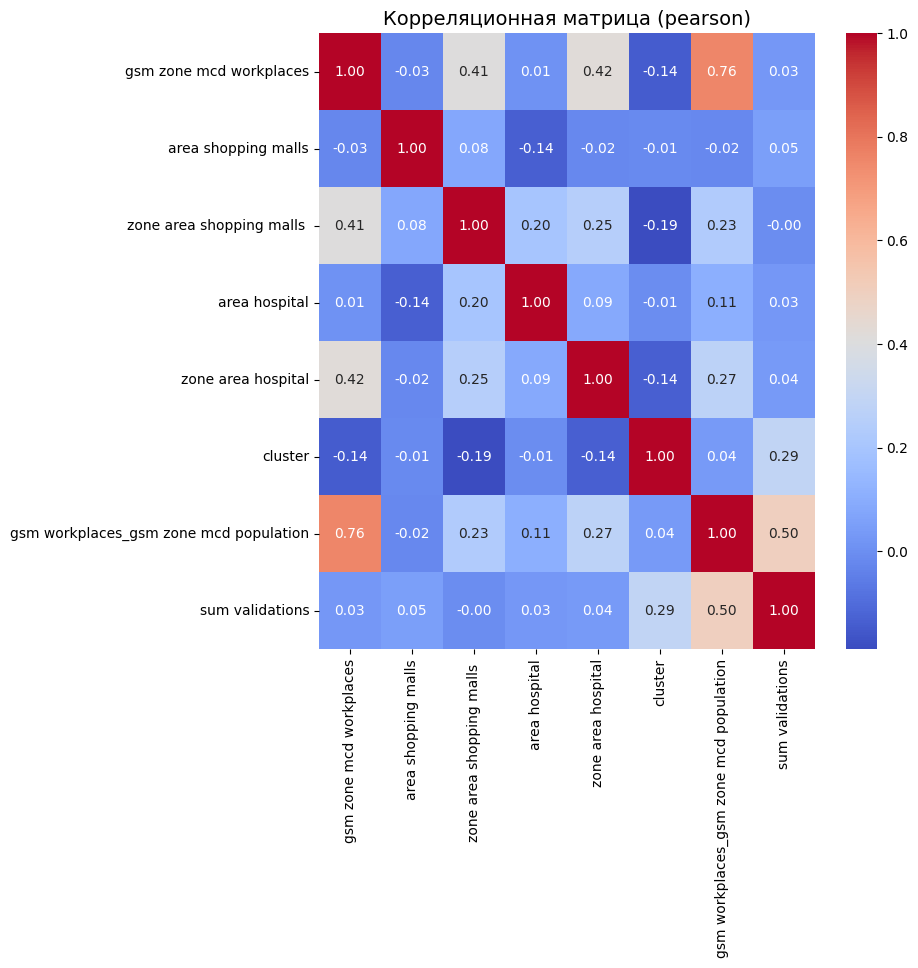

Ранг корреляционной матрицы: 7
Размер корреляционной матрицы: 7x7
Детерминант корреляционной матрицы: 0.227


In [54]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_1 = X_train_std_1.drop(columns=columns_drop)
X_test_std_drop_1 = X_test_std_1.drop(columns=columns_drop)

X_train_corr_1, X_test_corr_1 = data_proc.get_pca(X_train_std_drop_1, X_test_std_drop_1,
                                    columns_pca=columns_pca)
vif_1 = data_proc.get_VIF(X_train_corr_1)
vif_2 = data_proc.get_VIF(X_test_corr_1)
data_proc.plot_corrmatrix(X_train_corr_1, target=target_train_1, calc_det=True)

### <a id=5>Target 2</a>

gsm zone mcd workplaces  gsm workplaces_gsm zone mcd population  \
VIF                  3.50917                                3.014027   

     zone area hospital  area hospital  zone area shopping malls    cluster  \
VIF            1.310554       1.134501                   1.126957  1.096374   

     area shopping malls  
VIF             1.030518

zone area hospital  gsm zone mcd workplaces  area shopping malls  \
VIF            3.060316                 2.519761              2.34902   

     gsm workplaces_gsm zone mcd population  zone area shopping malls   \
VIF                                2.245044                   1.942468   

     area hospital  cluster  
VIF       1.554116  1.45612

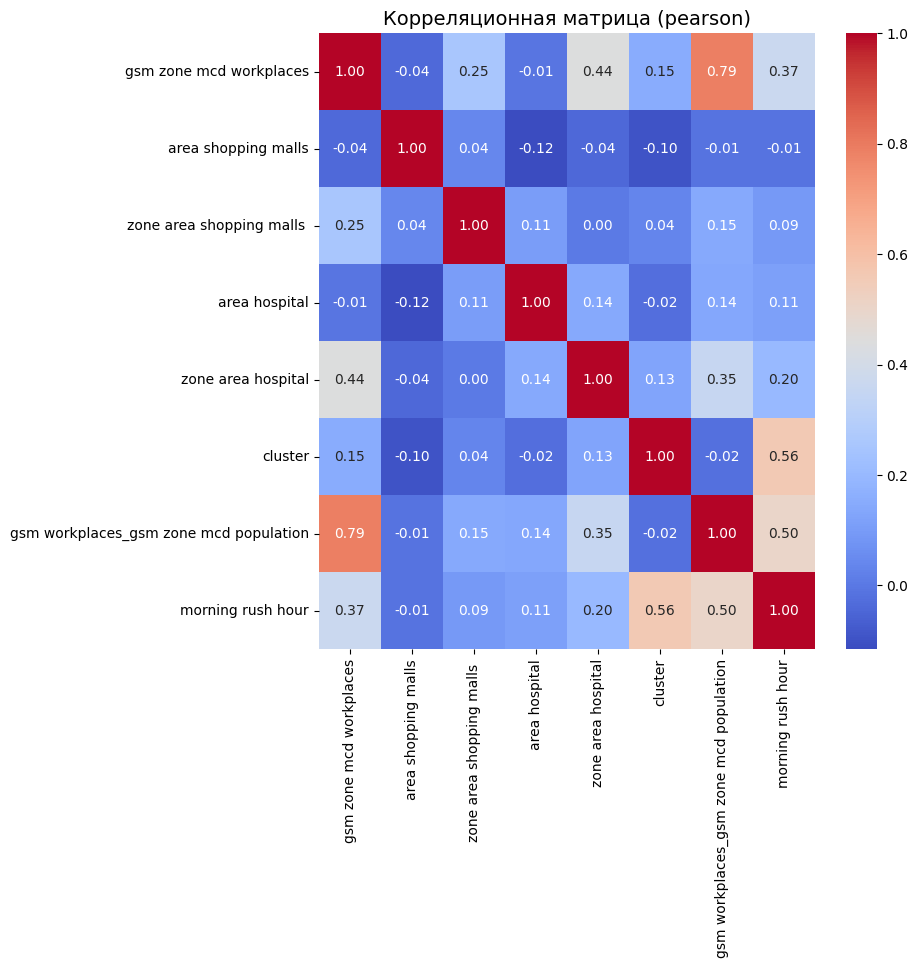

Ранг корреляционной матрицы: 7
Размер корреляционной матрицы: 7x7
Детерминант корреляционной матрицы: 0.222


In [55]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_2 = X_train_std_2.drop(columns=columns_drop)
X_test_std_drop_2 = X_test_std_2.drop(columns=columns_drop)

X_train_corr_2, X_test_corr_2 = data_proc.get_pca(X_train_std_drop_2, X_test_std_drop_2,
                                    columns_pca=columns_pca)
vif_2 = data_proc.get_VIF(X_train_corr_2)
vif_2 = data_proc.get_VIF(X_test_corr_2)
data_proc.plot_corrmatrix(X_train_corr_2, target=target_train_2, calc_det=True)

### <a id=5>Target 3</a>

gsm zone mcd workplaces  gsm workplaces_gsm zone mcd population  \
VIF                 3.546813                                2.860487   

     zone area shopping malls   zone area hospital  area hospital  cluster  \
VIF                   1.446926            1.345046       1.168852  1.10251   

     area shopping malls  
VIF             1.054878

gsm zone mcd workplaces  gsm workplaces_gsm zone mcd population  \
VIF                 4.049718                                3.333317   

     zone area hospital   cluster  area hospital  area shopping malls  \
VIF            1.428893  1.214987       1.112895             1.048058   

     zone area shopping malls   
VIF                   1.046224

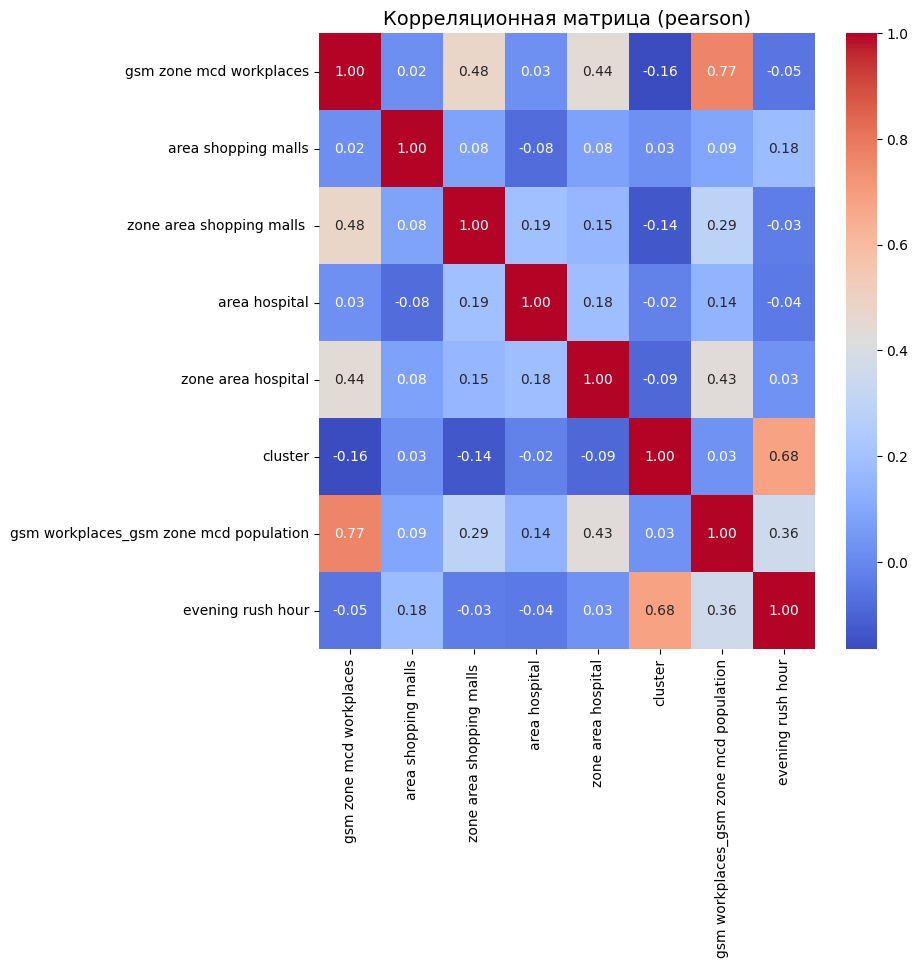

Ранг корреляционной матрицы: 7
Размер корреляционной матрицы: 7x7
Детерминант корреляционной матрицы: 0.184


In [56]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_3 = X_train_std_3.drop(columns=columns_drop)
X_test_std_drop_3 = X_test_std_3.drop(columns=columns_drop)

X_train_corr_3, X_test_corr_3 = data_proc.get_pca(X_train_std_drop_3, X_test_std_drop_3,
                                    columns_pca=columns_pca)
vif_3 = data_proc.get_VIF(X_train_corr_3)
vif_2 = data_proc.get_VIF(X_test_corr_3)
data_proc.plot_corrmatrix(X_train_corr_3, target=target_train_3, calc_det=True)

___
## <center><a id=3 style='color:red'>Полиномиальные факторы</a>

### <a id=5>Target 1</a>

In [57]:
X_train_poly_1, X_test_poly_1 = data_proc.get_polyfeatures(X_train_corr_1, X_test_corr_1)

X_train_poly_1.shape, X_test_poly_1.shape

((99, 35), (33, 35))

zone area shopping malls ^2  \
VIF                   745.612823   

     gsm zone mcd workplaces zone area shopping malls   \
VIF                                         733.004092   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                         213.656612                  

     gsm zone mcd workplaces gsm workplaces_gsm zone mcd population  \
VIF                                         122.107019                

     zone area shopping malls  area hospital  \
VIF                               110.556971   

     zone area shopping malls  cluster  gsm zone mcd workplaces^2  \
VIF                          79.634181                  46.209297   

     zone area shopping malls  zone area hospital  \
VIF                                     46.012623   

     gsm workplaces_gsm zone mcd population^2  \
VIF                                 42.387002   

     zone area hospital gsm workplaces_gsm zone mcd population  \
VIF                                          25.809977           

     area shopping malls zone area shopping malls   \
VIF                                      24.432812   

     area shopping malls gsm workplaces_gsm zone mcd population  \
VIF                                          24.349248            

     gsm zone mcd workplaces zone area hospital  zone area shopping malls   \
VIF                                   23.644361                  22.695557   

     area shopping malls^2  gsm zone mcd workplaces area shopping malls  \
VIF               21.68668                                    18.281471   

     gsm zone mcd workplaces  gsm zone mcd workplaces cluster  \
VIF                13.951634                         8.134504   

     gsm workplaces_gsm zone mcd population  zone area hospital cluster  \
VIF                                7.197587                    4.826551   

     gsm zone mcd workplaces area hospital   cluster  \
VIF                               4.530856  4.392115   

     area shopping malls cluster  \
VIF                     3.773526   

     area hospital gsm workplaces_gsm zone mcd population  area hospital^2  \
VIF                                           3.723451            3.267828   

     area hospital zone area hospital  cluster^2  area hospital cluster  \
VIF                          3.205472   2.955952               2.071331   

     cluster gsm workplaces_gsm zone mcd population  
VIF                                        2.024353

zone area shopping malls   zone area shopping malls  cluster  \
VIF               5.735105e+07                       3.304148e+07   

     zone area shopping malls ^2  \
VIF                 2.736889e+07   

     gsm zone mcd workplaces zone area shopping malls   \
VIF                                       1.091364e+07   

     zone area hospital gsm workplaces_gsm zone mcd population  \
VIF                                       7.496365e+06           

     zone area shopping malls  area hospital  \
VIF                             6.380035e+06   

     zone area shopping malls  zone area hospital  \
VIF                                  5.765181e+06   

     area hospital zone area hospital  \
VIF                      2.310997e+06   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                       1.341258e+06                  

          cluster  gsm zone mcd workplaces  zone area hospital cluster  \
VIF  1.338703e+06            249715.217766               243087.267231   

     gsm workplaces_gsm zone mcd population  gsm zone mcd workplaces^2  \
VIF                            142091.91171               42669.764992   

     gsm zone mcd workplaces gsm workplaces_gsm zone mcd population  \
VIF                                        7296.936065                

     gsm zone mcd workplaces zone area hospital  \
VIF                                 5059.215072   

     area shopping malls gsm workplaces_gsm zone mcd population  \
VIF                                        4366.159442            

     gsm zone mcd workplaces area hospital  \
VIF                            2318.831957   

     gsm workplaces_gsm zone mcd population^2  \
VIF                               1574.393006   

     area shopping malls zone area shopping malls   \
VIF                                    1445.801927   

     area hospital gsm workplaces_gsm zone mcd population  \
VIF                                         909.774751      

     gsm zone mcd workplaces cluster  \
VIF                        617.85559   

     gsm zone mcd workplaces area shopping malls  area shopping malls^2  \
VIF                                   584.218106             417.145102   

     cluster gsm workplaces_gsm zone mcd population  cluster^2  \
VIF                                      107.811749  74.477364   

     area shopping malls cluster  area hospital cluster  area hospital^2  
VIF                    48.652393              41.954373         8.155533

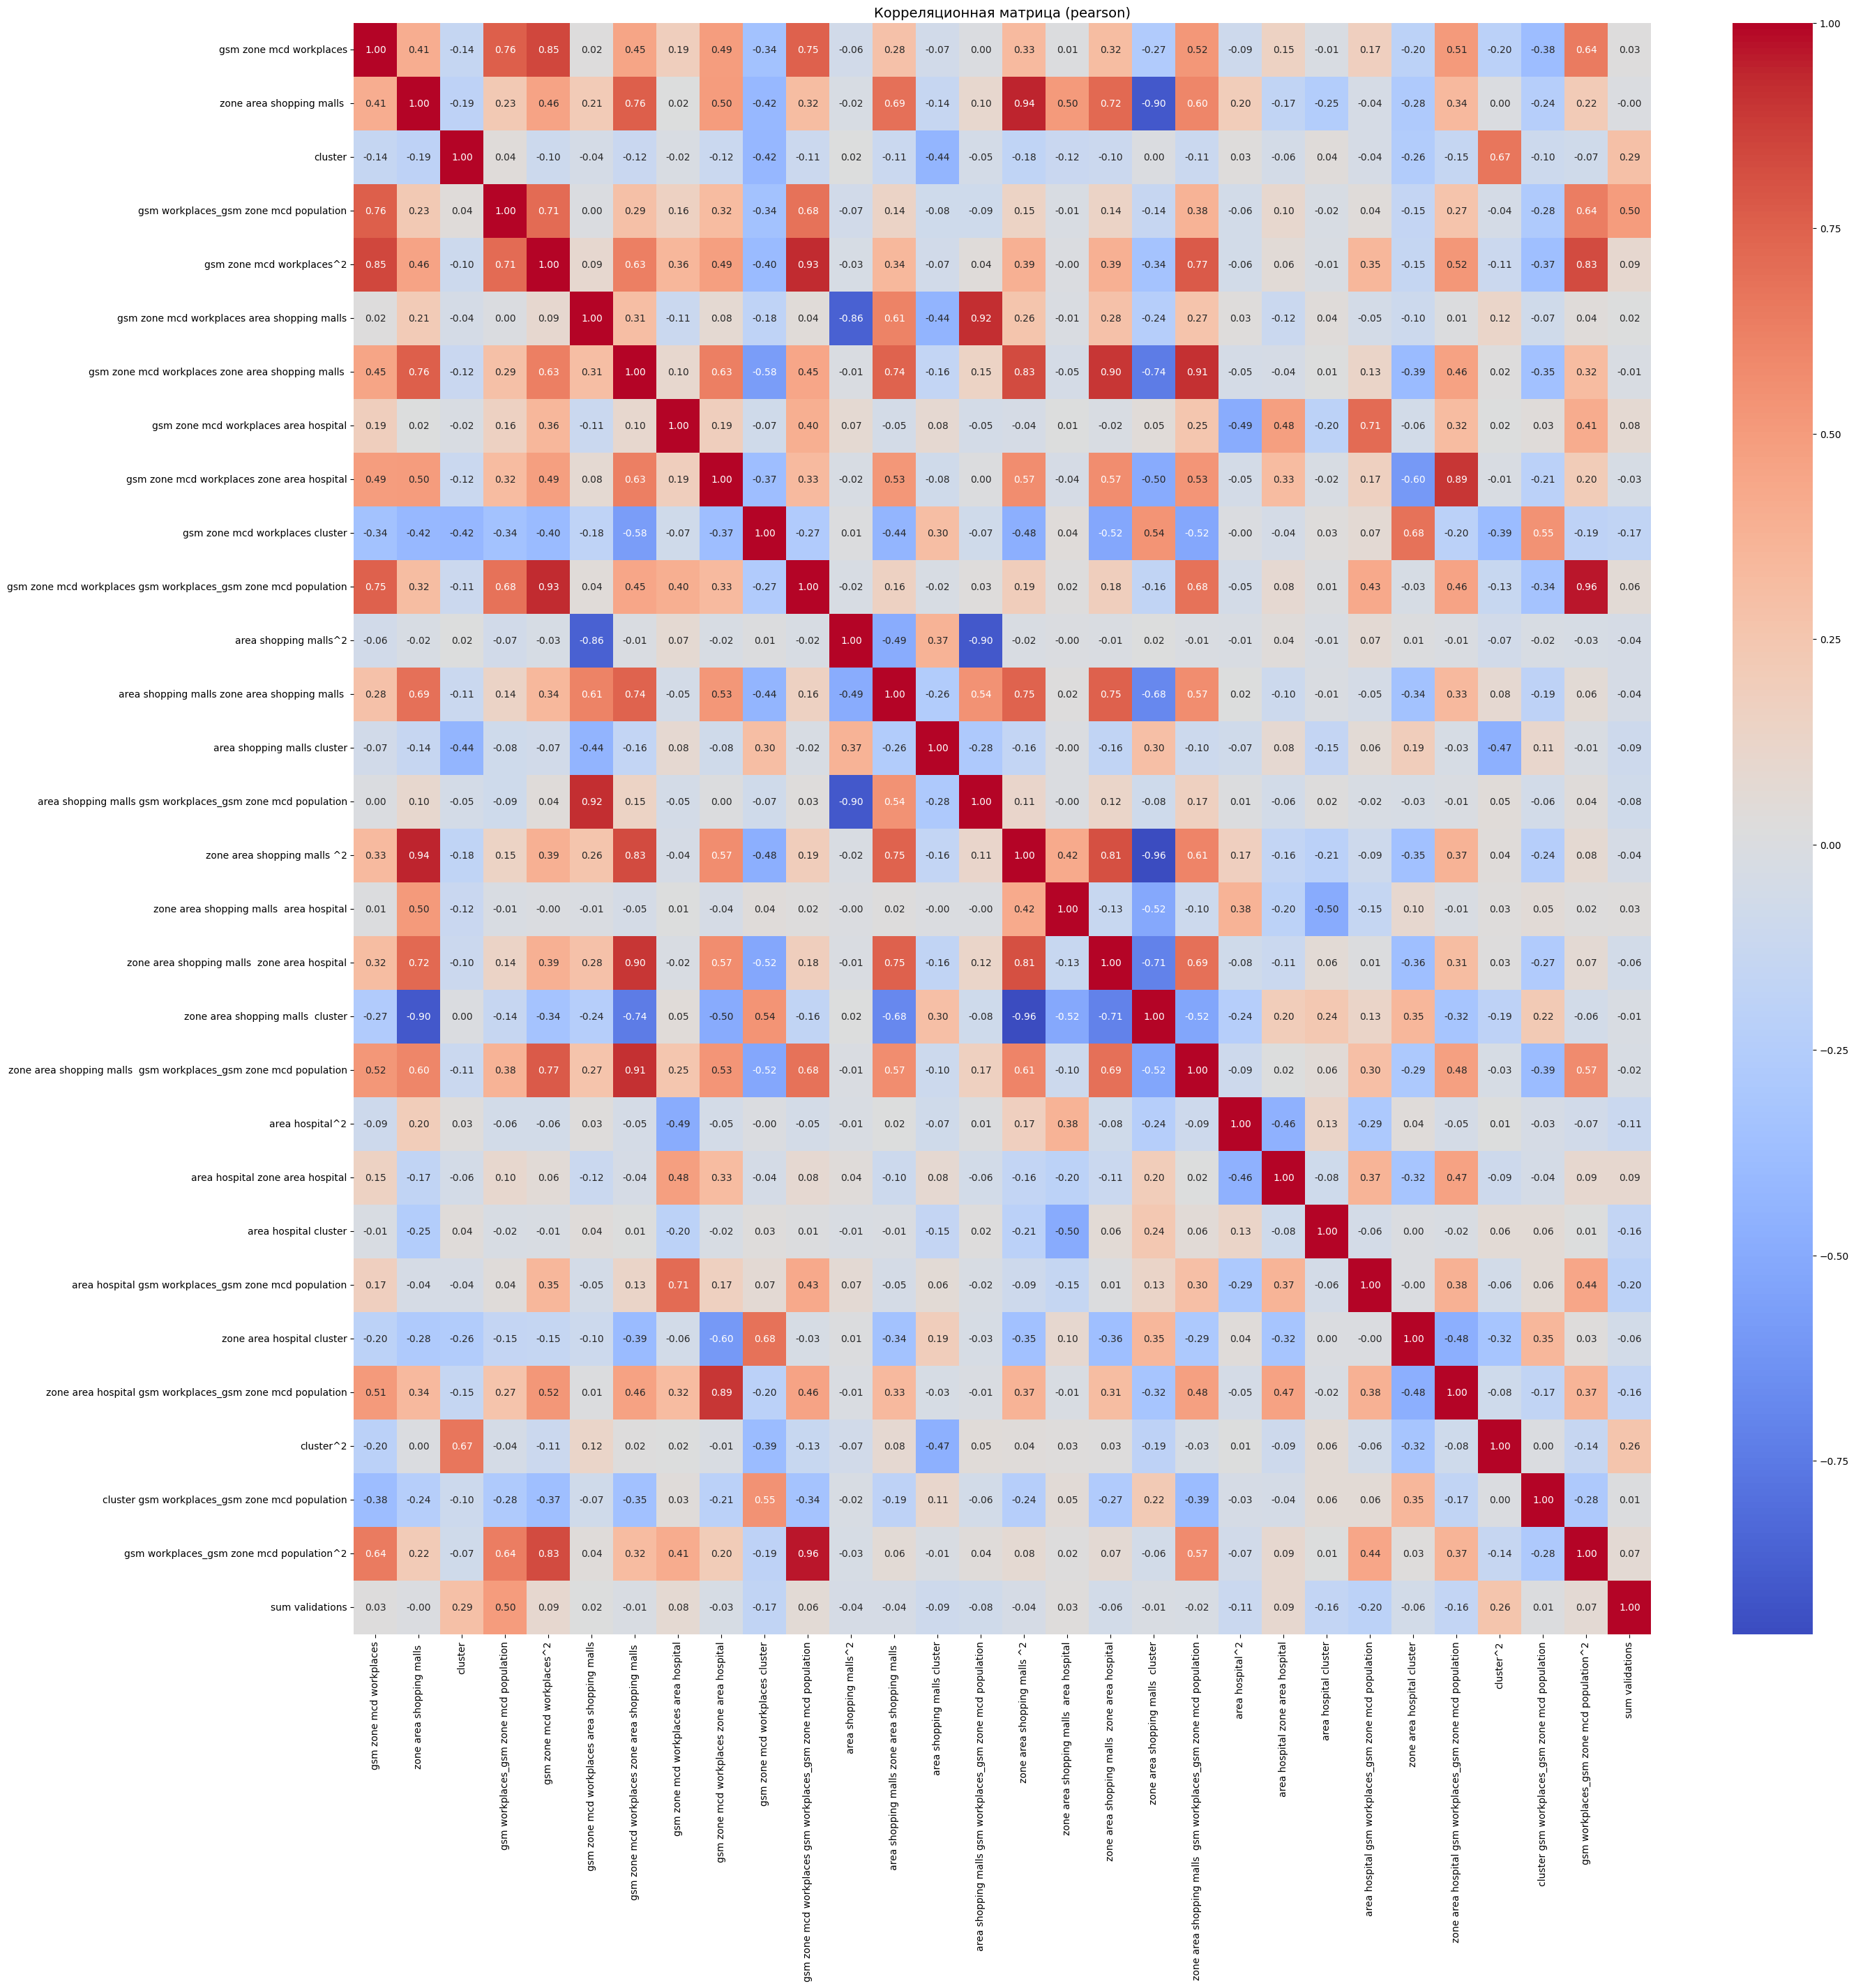

Ранг корреляционной матрицы: 29
Размер корреляционной матрицы: 29x29
Детерминант корреляционной матрицы: 0.000


In [58]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
]


X_train_poly_corr_1 = X_train_poly_1.drop(columns=columns_drop)

X_test_poly_corr_1 = X_test_poly_1.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_1)

vif_2 = data_proc.get_VIF(X_test_poly_corr_1)

data_proc.plot_corrmatrix(X_train_poly_corr_1, target=target_1, calc_det=True)

### <a id=5>Target 2</a>

In [59]:
X_train_poly_2, X_test_poly_2 = data_proc.get_polyfeatures(X_train_corr_2, X_test_corr_2)

X_train_poly_2.shape, X_test_poly_2.shape

((99, 35), (33, 35))

gsm zone mcd workplaces zone area shopping malls   \
VIF                                         361.472943   

     gsm zone mcd workplaces gsm workplaces_gsm zone mcd population  \
VIF                                         306.805103                

     gsm zone mcd workplaces^2  zone area shopping malls   \
VIF                 302.339829                 164.531155   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                         163.156137                  

     zone area shopping malls ^2  \
VIF                   140.460814   

     zone area hospital gsm workplaces_gsm zone mcd population  \
VIF                                          97.253939           

     gsm zone mcd workplaces zone area hospital  \
VIF                                   83.618096   

     gsm workplaces_gsm zone mcd population^2  \
VIF                                 64.423579   

     gsm zone mcd workplaces area shopping malls  \
VIF                                     34.46363   

     zone area shopping malls  cluster  \
VIF                           34.45136   

     zone area shopping malls  zone area hospital  \
VIF                                     32.424021   

     area shopping malls zone area shopping malls   \
VIF                                      25.337734   

     area shopping malls gsm workplaces_gsm zone mcd population  \
VIF                                          22.677717            

     gsm zone mcd workplaces  gsm zone mcd workplaces area hospital  \
VIF                19.770671                              14.367681   

     zone area shopping malls  area hospital  area shopping malls^2  \
VIF                                 13.26898              10.728503   

     gsm workplaces_gsm zone mcd population  area shopping malls cluster  \
VIF                               10.210405                     9.968244   

      cluster  gsm zone mcd workplaces cluster  \
VIF  9.861979                         9.068824   

     cluster gsm workplaces_gsm zone mcd population  \
VIF                                        7.679969   

     area hospital zone area hospital  \
VIF                          7.120438   

     area hospital gsm workplaces_gsm zone mcd population  area hospital^2  \
VIF                                           4.313611            4.103492   

     zone area hospital cluster  cluster^2  area hospital cluster  
VIF                    3.301416   1.701658                1.69551

gsm zone mcd workplaces zone area shopping malls   \
VIF                                       7.660551e+10   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                       3.263821e+10                  

     zone area shopping malls   zone area shopping malls ^2  \
VIF               4.266993e+09                 1.019615e+09   

     gsm workplaces_gsm zone mcd population  \
VIF                            7.895834e+08   

     zone area shopping malls  cluster       cluster  gsm zone mcd workplaces  \
VIF                       7.668028e+08  7.104578e+08             3.677332e+08   

     zone area shopping malls  zone area hospital  \
VIF                                  2.258734e+07   

     gsm zone mcd workplaces zone area hospital  zone area hospital cluster  \
VIF                                6.420742e+06               638841.506277   

     zone area hospital gsm workplaces_gsm zone mcd population  \
VIF                                      511386.949646           

     area hospital zone area hospital  \
VIF                     174863.487879   

     area shopping malls zone area shopping malls   gsm zone mcd workplaces^2  \
VIF                                  117750.387621               67252.909963   

     gsm zone mcd workplaces area hospital  \
VIF                            20856.28074   

     zone area shopping malls  area hospital  \
VIF                             13666.360273   

     gsm zone mcd workplaces area shopping malls  \
VIF                                 13331.186999   

     gsm zone mcd workplaces cluster  area shopping malls^2  \
VIF                     10457.071708            8943.149384   

     gsm zone mcd workplaces gsm workplaces_gsm zone mcd population  \
VIF                                        3974.578043                

     area shopping malls gsm workplaces_gsm zone mcd population  \
VIF                                        1539.408538            

     area shopping malls cluster  \
VIF                   134.915573   

     area hospital gsm workplaces_gsm zone mcd population  \
VIF                                         134.204122      

     area hospital cluster  gsm workplaces_gsm zone mcd population^2  \
VIF              98.042037                                 91.819027   

     area hospital^2  cluster gsm workplaces_gsm zone mcd population  \
VIF        47.518304                                       34.510955   

     cluster^2  
VIF   5.593245

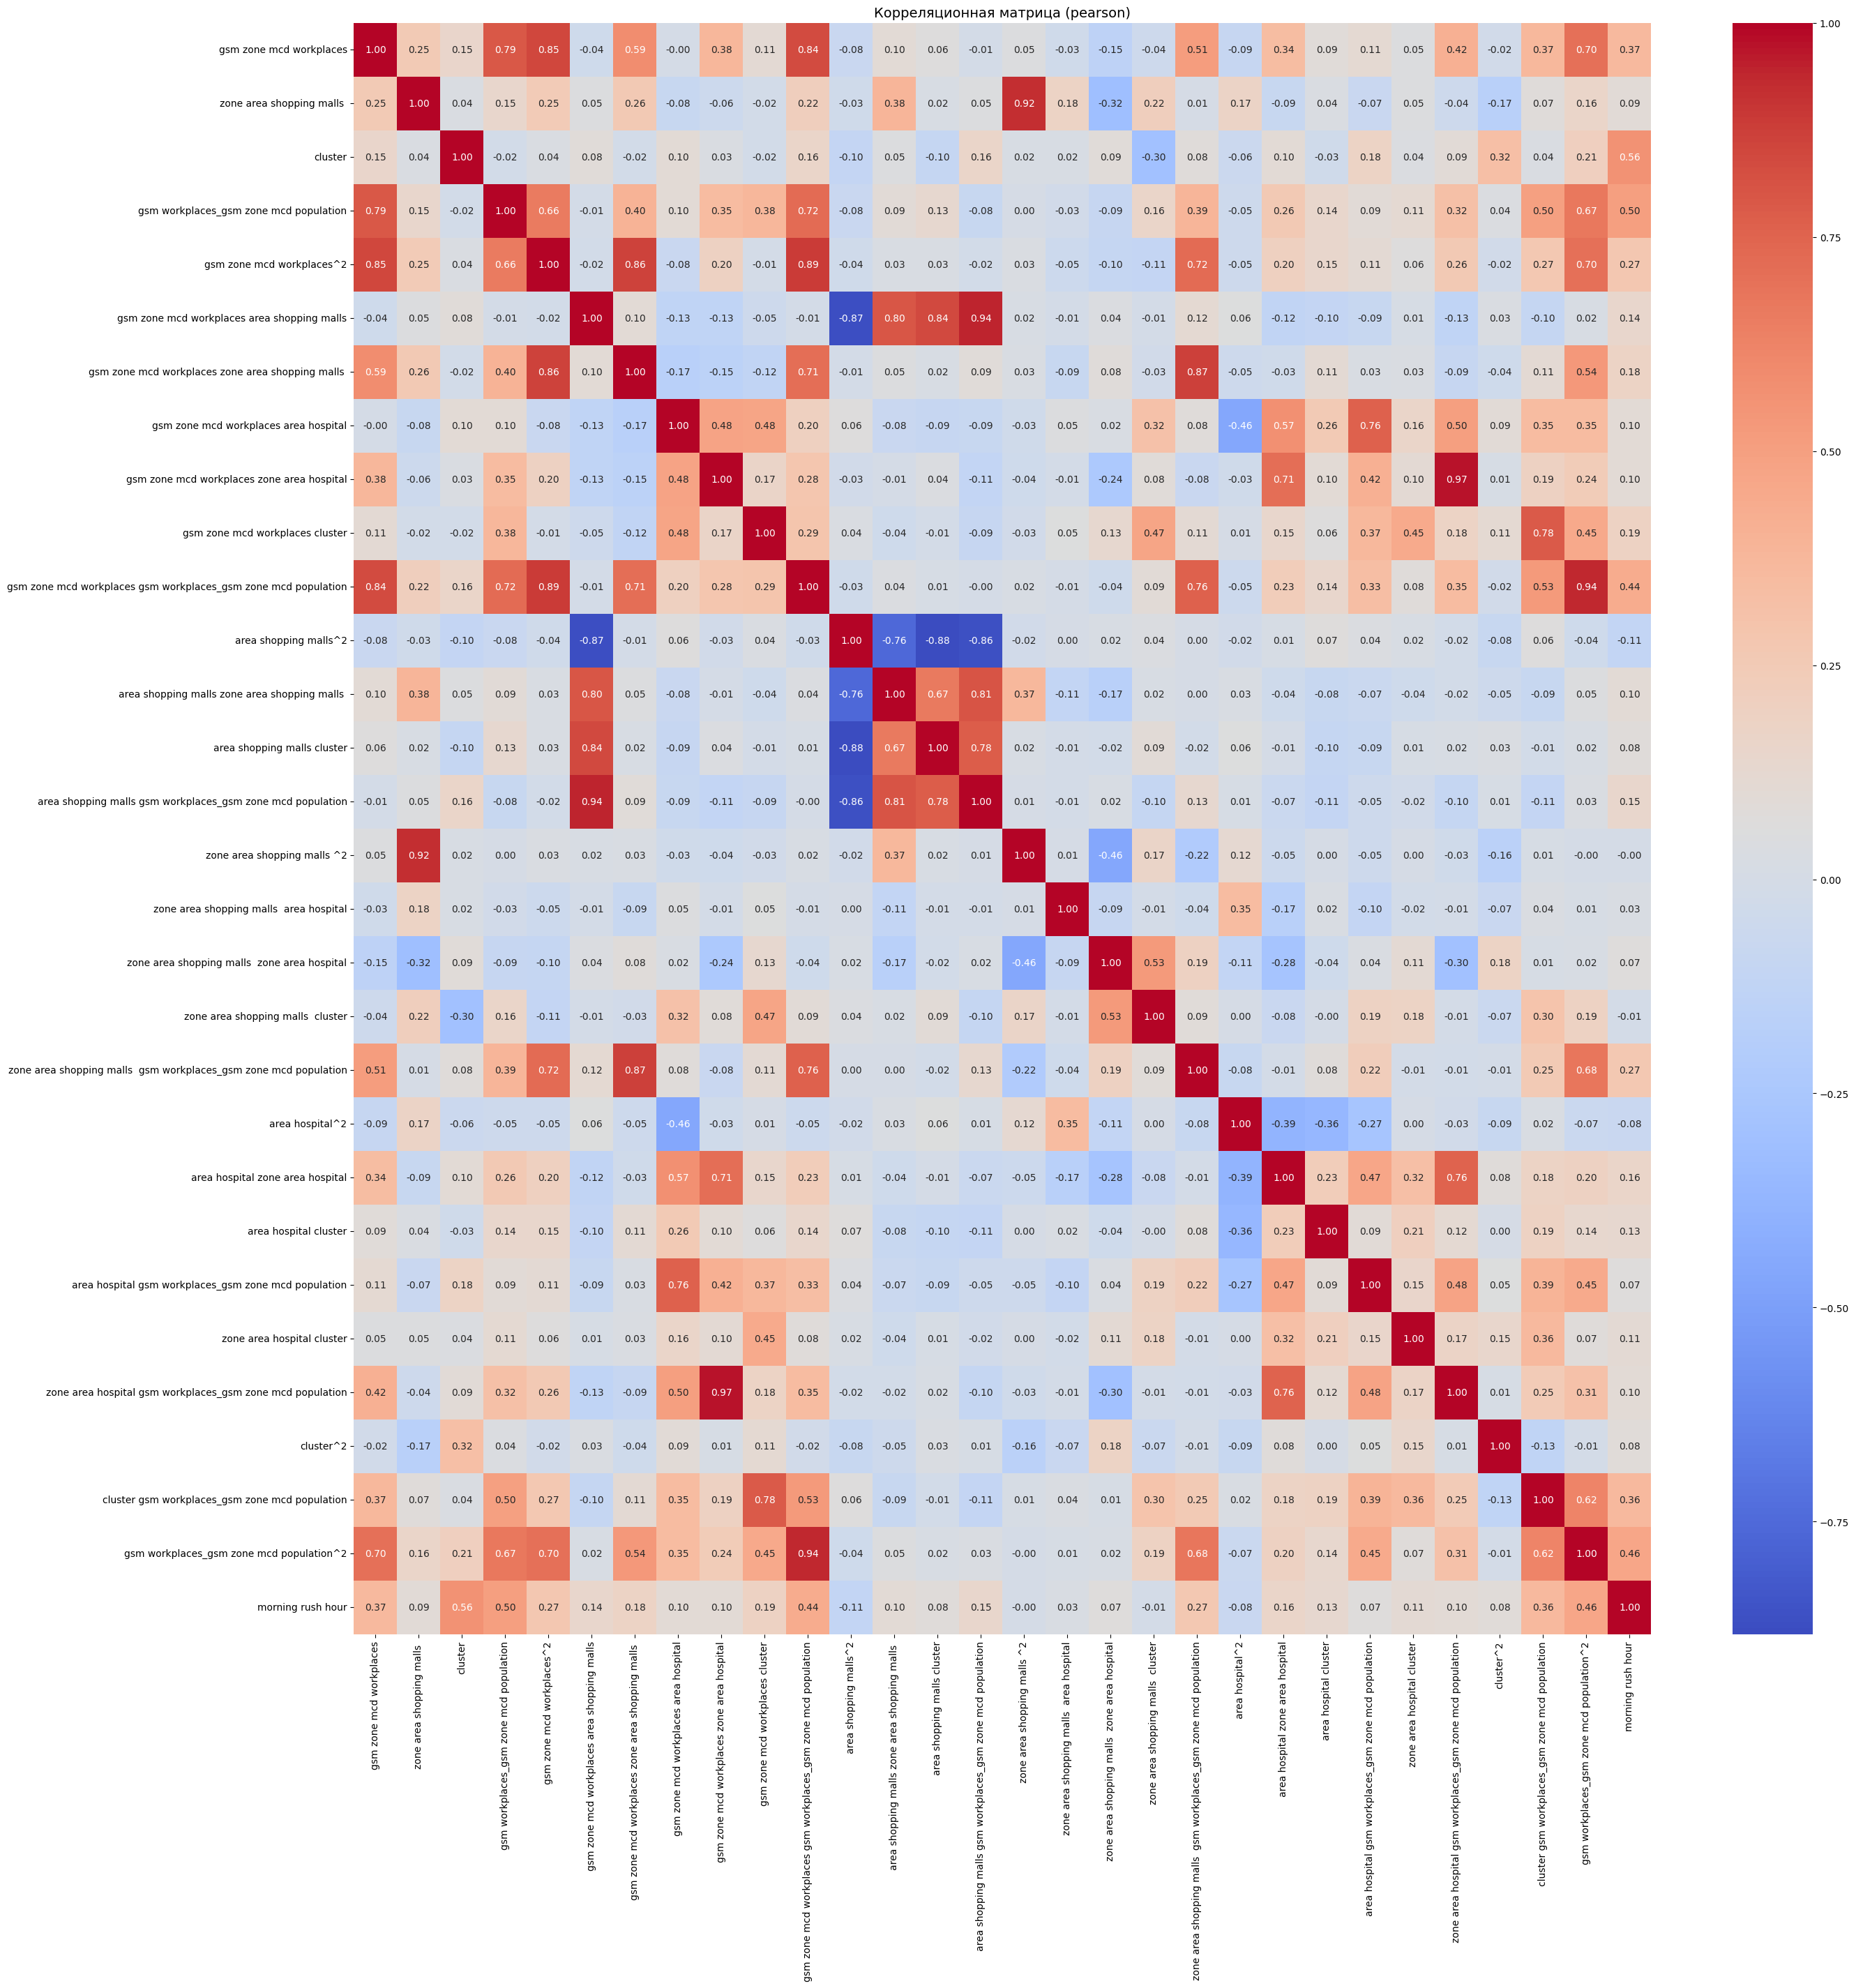

Ранг корреляционной матрицы: 29
Размер корреляционной матрицы: 29x29
Детерминант корреляционной матрицы: 0.000


In [60]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
]


X_train_poly_corr_2 = X_train_poly_2.drop(columns=columns_drop)

X_test_poly_corr_2 = X_test_poly_2.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_2)

vif_2 = data_proc.get_VIF(X_test_poly_corr_2)

data_proc.plot_corrmatrix(X_train_poly_corr_2, target=target_2, calc_det=True)

### <a id=5>Target 3</a>


In [61]:
X_train_poly_3, X_test_poly_3 = data_proc.get_polyfeatures(X_train_corr_3, X_test_corr_3)

X_train_poly_3.shape, X_test_poly_3.shape

((99, 35), (33, 35))

gsm zone mcd workplaces  zone area shopping malls  cluster  \
VIF                 4.760843                           4.440005   

     area hospital zone area hospital  \
VIF                          4.378075   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                           3.791164                  

     area shopping malls zone area shopping malls   \
VIF                                       3.667139   

     gsm zone mcd workplaces zone area hospital  \
VIF                                    3.586063   

     gsm workplaces_gsm zone mcd population  \
VIF                                3.478483   

     zone area shopping malls  area hospital  cluster^2  \
VIF                                 3.374144   2.392238   

     area shopping malls gsm workplaces_gsm zone mcd population  \
VIF                                           2.320493            

     area hospital gsm workplaces_gsm zone mcd population  \
VIF                                           2.270427      

     area shopping malls cluster  \
VIF                     2.245335   

     cluster gsm workplaces_gsm zone mcd population  area hospital^2  \
VIF                                        2.220836         2.141926   

      cluster  zone area hospital cluster  area hospital cluster  
VIF  2.135321                     1.74193               1.608132

area shopping malls zone area shopping malls   \
VIF                                     250.372261   

     zone area shopping malls  area hospital  \
VIF                                199.60804   

     zone area shopping malls  cluster  \
VIF                         113.595859   

     area shopping malls gsm workplaces_gsm zone mcd population    cluster  \
VIF                                          82.116199           28.825877   

     zone area shopping malls  gsm workplaces_gsm zone mcd population  \
VIF                                          28.224656                  

     area shopping malls cluster  zone area hospital cluster  \
VIF                    20.029016                   19.595332   

     gsm workplaces_gsm zone mcd population  \
VIF                               11.505173   

     gsm zone mcd workplaces zone area hospital  gsm zone mcd workplaces  \
VIF                                    8.568422                 7.098307   

     area hospital zone area hospital  \
VIF                          6.633782   

     cluster gsm workplaces_gsm zone mcd population  area hospital^2  \
VIF                                        5.370606         3.819625   

     cluster^2  area hospital cluster  \
VIF   3.563064               2.944196   

     area hospital gsm workplaces_gsm zone mcd population  
VIF                                           2.750692

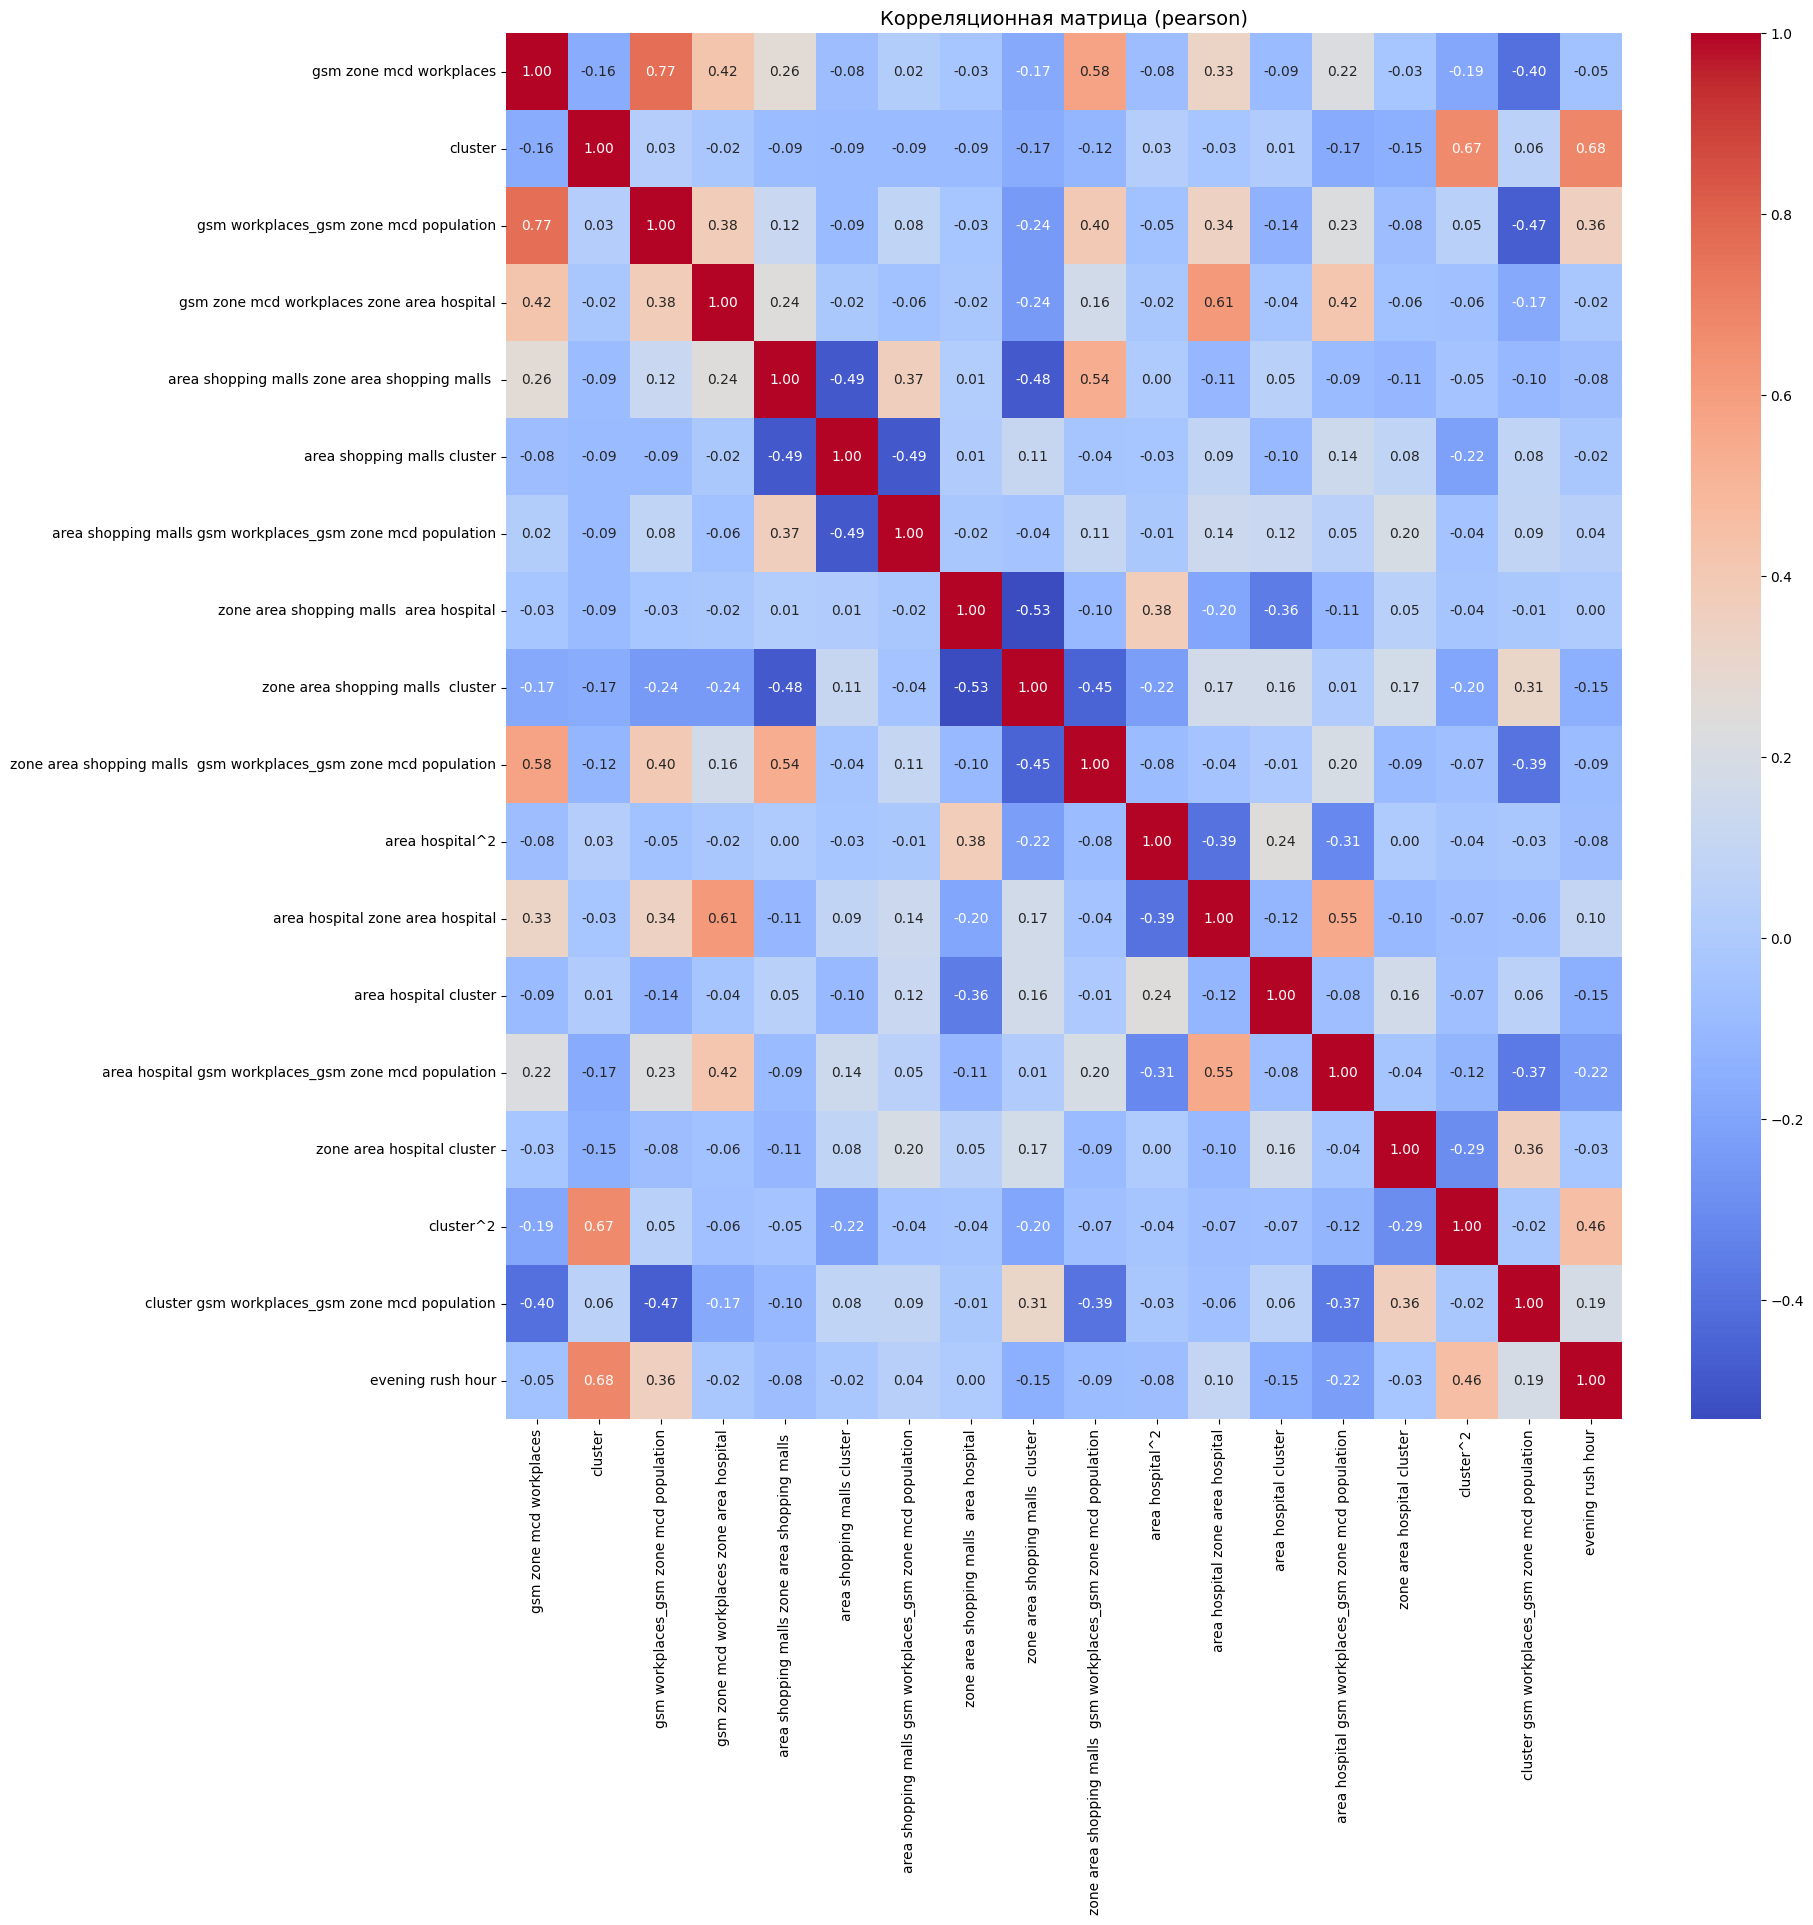

Ранг корреляционной матрицы: 17
Размер корреляционной матрицы: 17x17
Детерминант корреляционной матрицы: 0.000


In [62]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
    "gsm zone mcd workplaces zone area shopping malls ",
    "gsm zone mcd workplaces gsm workplaces_gsm zone mcd population",
    "zone area shopping malls  zone area hospital",
    "zone area hospital gsm workplaces_gsm zone mcd population",
    "zone area shopping malls ",
    "gsm zone mcd workplaces area shopping malls",
    "gsm zone mcd workplaces^2",
    "zone area shopping malls ^2",
    "gsm zone mcd workplaces area hospital",
    "area shopping malls^2",
    "gsm workplaces_gsm zone mcd population^2",
    "gsm zone mcd workplaces cluster"
]


X_train_poly_corr_3 = X_train_poly_3.drop(columns=columns_drop)

X_test_poly_corr_3 = X_test_poly_3.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_3)

vif_2 = data_proc.get_VIF(X_test_poly_corr_3)

data_proc.plot_corrmatrix(X_train_poly_corr_3, target=target_3, calc_det=True)

___
## <center><a id=3 style='color:red'>Сохранение данных</a>

___
___

In [63]:
DIR = 'train/'
FILE_DICT = {
            'X_train_1': df_train_1,
            'target_train_1': target_train_1,
            'X_train_2': df_train_2,
            'target_train_2': target_train_2,
            'X_train_3': df_train_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train/X_train_1.pkl успешно сохранён.
Файл data/train/target_train_1.pkl успешно сохранён.
Файл data/train/X_train_2.pkl успешно сохранён.
Файл data/train/target_train_2.pkl успешно сохранён.
Файл data/train/X_train_3.pkl успешно сохранён.
Файл data/train/target_train_3.pkl успешно сохранён.


In [64]:
DIR = 'test/'
FILE_DICT = {
            'X_test_1': df_test_1,
            'target_test_1': target_test_1,
            'X_test_2': df_test_2,
            'target_test_2': target_test_2,
            'X_test_3': df_test_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test/X_test_1.pkl успешно сохранён.
Файл data/test/target_test_1.pkl успешно сохранён.
Файл data/test/X_test_2.pkl успешно сохранён.
Файл data/test/target_test_2.pkl успешно сохранён.
Файл data/test/X_test_3.pkl успешно сохранён.
Файл data/test/target_test_3.pkl успешно сохранён.


____

In [65]:
DIR = 'train_std/'
FILE_DICT = {
            'X_train_std_1': X_train_std_1,
            'target_train_1': target_train_1,
            'X_train_std_2': X_train_std_2,
            'target_train_2': target_train_2,
            'X_train_std_3': X_train_std_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_std/X_train_std_1.pkl успешно сохранён.
Файл data/train_std/target_train_1.pkl успешно сохранён.
Файл data/train_std/X_train_std_2.pkl успешно сохранён.
Файл data/train_std/target_train_2.pkl успешно сохранён.
Файл data/train_std/X_train_std_3.pkl успешно сохранён.
Файл data/train_std/target_train_3.pkl успешно сохранён.


In [66]:
DIR = 'test_std/'
FILE_DICT = {
            'X_test_std_1': X_test_std_1,
            'target_test_1': target_test_1,
            'X_test_std_2': X_test_std_2,
            'target_test_2': target_test_2,
            'X_test_std_3': X_test_std_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_std/X_test_std_1.pkl успешно сохранён.
Файл data/test_std/target_test_1.pkl успешно сохранён.
Файл data/test_std/X_test_std_2.pkl успешно сохранён.
Файл data/test_std/target_test_2.pkl успешно сохранён.
Файл data/test_std/X_test_std_3.pkl успешно сохранён.
Файл data/test_std/target_test_3.pkl успешно сохранён.


___

In [67]:
DIR = 'train_mm/'
FILE_DICT = {
            'X_train_mm_1': X_train_mm_1,
            'target_train_1': target_train_1,
            'X_train_mm_2': X_train_mm_2,
            'target_train_2': target_train_2,
            'X_train_mm_3': X_train_mm_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_mm/X_train_mm_1.pkl успешно сохранён.
Файл data/train_mm/target_train_1.pkl успешно сохранён.
Файл data/train_mm/X_train_mm_2.pkl успешно сохранён.
Файл data/train_mm/target_train_2.pkl успешно сохранён.
Файл data/train_mm/X_train_mm_3.pkl успешно сохранён.
Файл data/train_mm/target_train_3.pkl успешно сохранён.


In [68]:
DIR = 'test_mm/'
FILE_DICT = {
            'X_test_mm_1': X_test_mm_1,
            'target_test_1': target_test_1,
            'X_test_mm_2': X_test_mm_2,
            'target_test_2': target_test_2,
            'X_test_mm_3': X_test_mm_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_mm/X_test_mm_1.pkl успешно сохранён.
Файл data/test_mm/target_test_1.pkl успешно сохранён.
Файл data/test_mm/X_test_mm_2.pkl успешно сохранён.
Файл data/test_mm/target_test_2.pkl успешно сохранён.
Файл data/test_mm/X_test_mm_3.pkl успешно сохранён.
Файл data/test_mm/target_test_3.pkl успешно сохранён.


___

___

In [69]:
DIR = 'train_corr/'
FILE_DICT = {
            'X_train_corr_1': X_train_corr_1,
            'target_train_1': target_train_1,
            'X_train_corr_2': X_train_corr_2,
            'target_train_2': target_train_2,
            'X_train_corr_3': X_train_corr_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_corr/X_train_corr_1.pkl успешно сохранён.
Файл data/train_corr/target_train_1.pkl успешно сохранён.
Файл data/train_corr/X_train_corr_2.pkl успешно сохранён.
Файл data/train_corr/target_train_2.pkl успешно сохранён.
Файл data/train_corr/X_train_corr_3.pkl успешно сохранён.
Файл data/train_corr/target_train_3.pkl успешно сохранён.


In [70]:
DIR = 'test_corr/'
FILE_DICT = {
            'X_test_corr_1': X_test_corr_1,
            'target_test_1': target_test_1,
            'X_test_corr_2': X_test_corr_2,
            'target_test_2': target_test_2,
            'X_test_corr_3': X_test_corr_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_corr/X_test_corr_1.pkl успешно сохранён.
Файл data/test_corr/target_test_1.pkl успешно сохранён.
Файл data/test_corr/X_test_corr_2.pkl успешно сохранён.
Файл data/test_corr/target_test_2.pkl успешно сохранён.
Файл data/test_corr/X_test_corr_3.pkl успешно сохранён.
Файл data/test_corr/target_test_3.pkl успешно сохранён.


___

In [71]:
DIR = 'train_poly/'
FILE_DICT = {
            'X_train_poly_1': X_train_poly_1,
            'target_train_1': target_train_1,
            'X_train_poly_2': X_train_poly_2,
            'target_train_2': target_train_2,
            'X_train_poly_3': X_train_poly_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_poly/X_train_poly_1.pkl успешно сохранён.
Файл data/train_poly/target_train_1.pkl успешно сохранён.
Файл data/train_poly/X_train_poly_2.pkl успешно сохранён.
Файл data/train_poly/target_train_2.pkl успешно сохранён.
Файл data/train_poly/X_train_poly_3.pkl успешно сохранён.
Файл data/train_poly/target_train_3.pkl успешно сохранён.


In [72]:
DIR = 'test_poly/'
FILE_DICT = {
            'X_test_poly_1': X_test_poly_1,
            'target_test_1': target_test_1,
            'X_test_poly_2': X_test_poly_2,
            'target_test_2': target_test_2,
            'X_test_poly_3': X_test_poly_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_poly/X_test_poly_1.pkl успешно сохранён.
Файл data/test_poly/target_test_1.pkl успешно сохранён.
Файл data/test_poly/X_test_poly_2.pkl успешно сохранён.
Файл data/test_poly/target_test_2.pkl успешно сохранён.
Файл data/test_poly/X_test_poly_3.pkl успешно сохранён.
Файл data/test_poly/target_test_3.pkl успешно сохранён.


___

In [73]:
DIR = 'train_poly_corr/'
FILE_DICT = {
            'X_train_poly_corr_1': X_train_poly_corr_1,
            'target_train_1': target_train_1,
            'X_train_poly_corr_2': X_train_poly_corr_2,
            'target_train_2': target_train_2,
            'X_train_poly_corr_3': X_train_poly_corr_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_poly_corr/X_train_poly_corr_1.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_1.pkl успешно сохранён.
Файл data/train_poly_corr/X_train_poly_corr_2.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_2.pkl успешно сохранён.
Файл data/train_poly_corr/X_train_poly_corr_3.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_3.pkl успешно сохранён.


In [74]:
DIR = 'test_poly_corr/'
FILE_DICT = {
            'X_test_poly_corr_1': X_test_poly_corr_1,
            'target_test_1': target_test_1,
            'X_test_poly_corr_2': X_test_poly_corr_2,
            'target_test_2': target_test_2,
            'X_test_poly_corr_3': X_test_poly_corr_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_poly_corr/X_test_poly_corr_1.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_1.pkl успешно сохранён.
Файл data/test_poly_corr/X_test_poly_corr_2.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_2.pkl успешно сохранён.
Файл data/test_poly_corr/X_test_poly_corr_3.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_3.pkl успешно сохранён.


___

___
## <center><a id=3 style='color:red'>Загрузка данных</a>

In [75]:
DIR = 'train'
train_data = utils_io.load_data(sub_dir=DIR)

Файл data/train/X_train_2.pkl успешно загружен.
Файл data/train/X_train_3.pkl успешно загружен.
Файл data/train/target_train_3.pkl успешно загружен.
Файл data/train/target_train_1.pkl успешно загружен.
Файл data/train/X_train_1.pkl успешно загружен.
Файл data/train/target_train_2.pkl успешно загружен.


In [76]:
DIR = 'test/'
test_data = utils_io.load_data( sub_dir=DIR )

Файл data/test//target_test_2.pkl успешно загружен.
Файл data/test//X_test_2.pkl успешно загружен.
Файл data/test//target_test_3.pkl успешно загружен.
Файл data/test//X_test_3.pkl успешно загружен.
Файл data/test//target_test_1.pkl успешно загружен.
Файл data/test//X_test_1.pkl успешно загружен.


In [77]:
DIR = 'train_std/'

train_std_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_std//X_train_std_1.pkl успешно загружен.
Файл data/train_std//target_train_3.pkl успешно загружен.
Файл data/train_std//target_train_1.pkl успешно загружен.
Файл data/train_std//X_train_std_2.pkl успешно загружен.
Файл data/train_std//target_train_2.pkl успешно загружен.
Файл data/train_std//X_train_std_3.pkl успешно загружен.


In [78]:
DIR = 'test_std/'
test_std_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_std//target_test_2.pkl успешно загружен.
Файл data/test_std//X_test_std_2.pkl успешно загружен.
Файл data/test_std//target_test_3.pkl успешно загружен.
Файл data/test_std//target_test_1.pkl успешно загружен.
Файл data/test_std//X_test_std_1.pkl успешно загружен.
Файл data/test_std//X_test_std_3.pkl успешно загружен.


____

In [79]:
DIR = 'train_corr/'

train_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_corr//X_train_corr_2.pkl успешно загружен.
Файл data/train_corr//target_train_3.pkl успешно загружен.
Файл data/train_corr//X_train_corr_3.pkl успешно загружен.
Файл data/train_corr//target_train_1.pkl успешно загружен.
Файл data/train_corr//X_train_corr_1.pkl успешно загружен.
Файл data/train_corr//target_train_2.pkl успешно загружен.


In [80]:
DIR = 'test_corr/'

test_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_corr//target_test_2.pkl успешно загружен.
Файл data/test_corr//target_test_3.pkl успешно загружен.
Файл data/test_corr//X_test_corr_1.pkl успешно загружен.
Файл data/test_corr//target_test_1.pkl успешно загружен.
Файл data/test_corr//X_test_corr_2.pkl успешно загружен.
Файл data/test_corr//X_test_corr_3.pkl успешно загружен.


In [81]:
DIR = 'train_mm/'

train_mm_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_mm//X_train_mm_2.pkl успешно загружен.
Файл data/train_mm//X_train_mm_1.pkl успешно загружен.
Файл data/train_mm//target_train_3.pkl успешно загружен.
Файл data/train_mm//target_train_1.pkl успешно загружен.
Файл data/train_mm//X_train_mm_3.pkl успешно загружен.
Файл data/train_mm//target_train_2.pkl успешно загружен.


In [82]:
DIR = 'test_mm/'

test_mm_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_mm//target_test_2.pkl успешно загружен.
Файл data/test_mm//X_test_mm_2.pkl успешно загружен.
Файл data/test_mm//X_test_mm_3.pkl успешно загружен.
Файл data/test_mm//X_test_mm_1.pkl успешно загружен.
Файл data/test_mm//target_test_3.pkl успешно загружен.
Файл data/test_mm//target_test_1.pkl успешно загружен.


___

___

In [83]:
DIR = 'train_poly'

train_poly_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_poly/X_train_poly_2.pkl успешно загружен.
Файл data/train_poly/X_train_poly_3.pkl успешно загружен.
Файл data/train_poly/target_train_3.pkl успешно загружен.
Файл data/train_poly/target_train_1.pkl успешно загружен.
Файл data/train_poly/X_train_poly_1.pkl успешно загружен.
Файл data/train_poly/target_train_2.pkl успешно загружен.


In [84]:
DIR = 'test_poly/'

test_poly_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_poly//target_test_2.pkl успешно загружен.
Файл data/test_poly//target_test_3.pkl успешно загружен.
Файл data/test_poly//target_test_1.pkl успешно загружен.
Файл data/test_poly//X_test_poly_2.pkl успешно загружен.
Файл data/test_poly//X_test_poly_3.pkl успешно загружен.
Файл data/test_poly//X_test_poly_1.pkl успешно загружен.


___

In [85]:
DIR = 'train_poly_corr'

train_poly_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/train_poly_corr/X_train_poly_corr_2.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_3.pkl успешно загружен.
Файл data/train_poly_corr/target_train_3.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_1.pkl успешно загружен.
Файл data/train_poly_corr/target_train_1.pkl успешно загружен.
Файл data/train_poly_corr/target_train_2.pkl успешно загружен.


In [86]:
DIR = 'test_poly_corr/'

test_poly_corr_data = utils_io.load_data( sub_dir=DIR )

Файл data/test_poly_corr//target_test_2.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_2.pkl успешно загружен.
Файл data/test_poly_corr//target_test_3.pkl успешно загружен.
Файл data/test_poly_corr//target_test_1.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_1.pkl успешно загружен.
Файл data/test_poly_corr//X_test_poly_corr_3.pkl успешно загружен.
